<h1>DRV Analysis</h1>

In [1]:
from properties import vwl_hold, vbl_hold, vblneg_hold, vwl_read, vbl_read, vblneg_read
from properties import rit_models, l_ax_standard, w_ax_step_param_standard, save_w_ax_standard, l_pmos_q_standard, w_pmos_q_standard, l_nmos_q_standard, w_nmos_q_standard, l_pmos_q_neg_standard, w_pmos_q_neg_standard, l_nmos_q_neg_standard, w_nmos_q_neg_standard, dc_vsweep_standard, vdd_standard, vsweep_standard
from properties import snm_max, snm_min
from properties import l_ax_seevinck, w_ax_step_param_seevinck, save_w_ax_seevinck, l_pmos_q_seevinck, w_pmos_q_seevinck, l_nmos_q_seevinck, w_nmos_q_seevinck, l_pmos_q_neg_seevinck, w_pmos_q_neg_seevinck, l_nmos_q_neg_seevinck, w_nmos_q_neg_seevinck, dc_vsweep_seevinck, vdd_seevinck, vsweep_seevinck, e1_seevinck, e2_seevinck, e3_seevinck, e4_seevinck, e5_seevinck, e6_seevinck, e7_seevinck, e8_seevinck
from properties import rit_models_montecarlo, l_ax_gaussian_vth, w_ax_step_param_gaussian_vth, save_w_ax_gaussian_vth, l_pmos_q_gaussian_vth, w_pmos_q_gaussian_vth, l_nmos_q_gaussian_vth, w_nmos_q_gaussian_vth, l_pmos_q_neg_gaussian_vth, w_pmos_q_neg_gaussian_vth, l_nmos_q_neg_gaussian_vth, w_nmos_q_neg_gaussian_vth, dc_vsweep_gaussian_vth, vdd_gaussian_vth, vsweep_gaussian_vth, e1_gaussian_vth, e2_gaussian_vth, e3_gaussian_vth, e4_gaussian_vth, e5_gaussian_vth, e6_gaussian_vth, e7_gaussian_vth, e8_gaussian_vth, step_param_run_gaussian_vth, w_ax_gaussian_vth
from utils.path import ltspice, schematics, images, data
from utils.check import check_output_image
from utils.patterns import w_ax_standard_pattern, w_ax_seevinck_pattern, w_ax_gaussian_vth_pattern, snm_max_seevinck_pattern, snm_min_seevinck_pattern
from models.snm import standard_processing, rotate_points, seevinck_processing
import re
from models.ops import load_asc, load_ltr
from PyLTSpice import SimRunner
import matplotlib.pyplot as plt
import os
from math import sqrt
from statistics import mean, stdev

In [2]:
# w_ax pick
w_ax_pos = 1

<h2>SNM Standard Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/standard/hold/standard_hold.asc


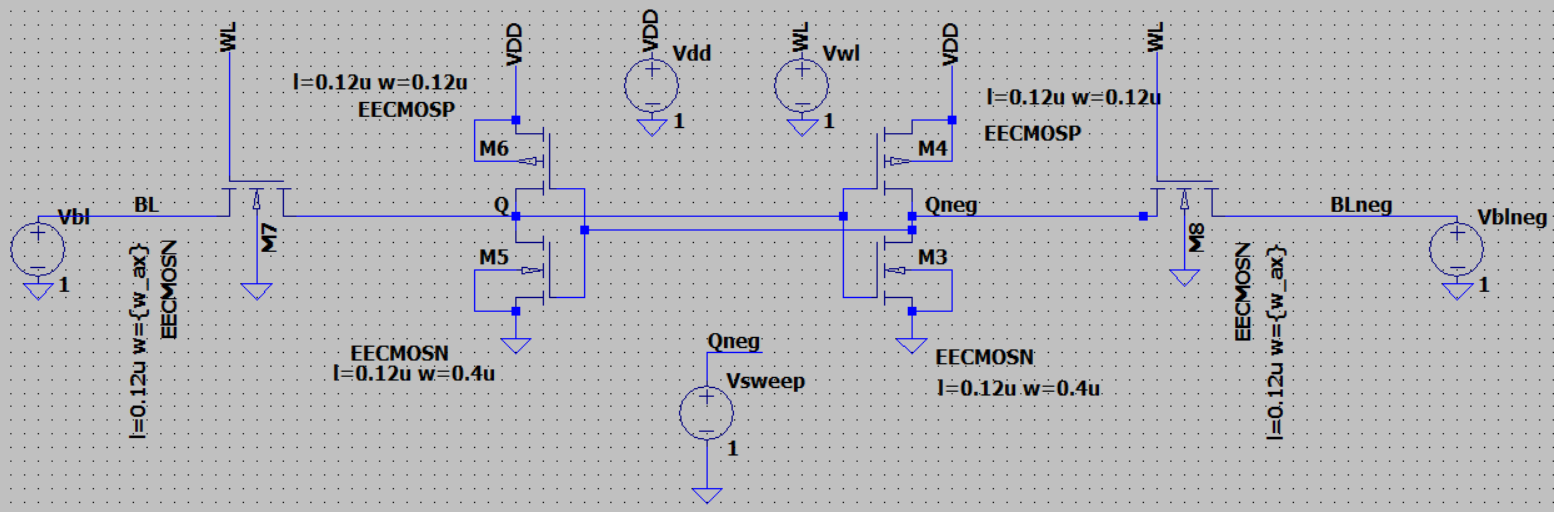

Successful/Total Simulations: 0/1
Raw file: data\standard\hold\standard_hold_1.raw, Log file: data\standard\hold\standard_hold_1.log
File opened successfully: data\standard\hold\standard_hold_1.raw
File updated successfully: ../../images/standard_hold_simulation.png


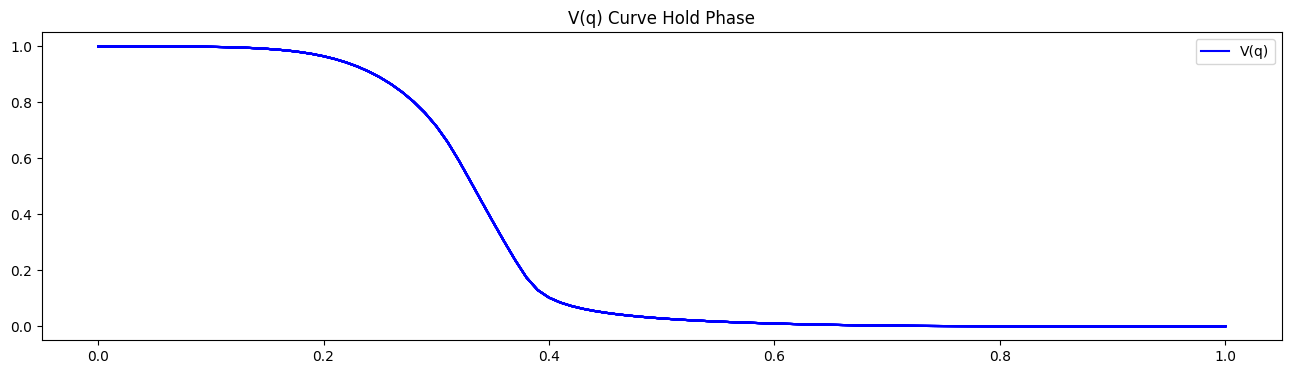

In [3]:
standard_hold_netlist = load_asc(
                                asc_file_path=os.path.join(ltspice, "standard/hold/standard_hold.asc"),
                                schematic_image_path=os.path.join(schematics, "standard.png")
                                )
vwl=vwl_hold; vbl=vbl_hold; vblneg=vblneg_hold
standard_hold_netlist.set_parameter('l_ax', l_ax_standard)
standard_hold_netlist.set_parameter('l_pmos_q', l_pmos_q_standard)
standard_hold_netlist.set_parameter('w_pmos_q', w_pmos_q_standard)
standard_hold_netlist.set_parameter('l_nmos_q', l_nmos_q_standard)
standard_hold_netlist.set_parameter('w_nmos_q', w_nmos_q_standard)
standard_hold_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_standard)
standard_hold_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_standard)
standard_hold_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_standard)
standard_hold_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_standard)
standard_hold_netlist.set_parameter('vdd', vdd_standard)
standard_hold_netlist.set_parameter('vwl', vwl)
standard_hold_netlist.set_parameter('vbl', vbl)
standard_hold_netlist.set_parameter('vblneg', vblneg)
standard_hold_netlist.set_parameter('vsweep', vsweep_standard)
standard_hold_netlist.add_instructions(
                                        rit_models,
                                        dc_vsweep_standard,
                                        w_ax_step_param_standard,
                                        save_w_ax_standard
                                    )
standard_hold_runner = SimRunner(output_folder=f"{data}/standard/hold/")
standard_hold_runner.run(netlist=standard_hold_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(standard_hold_runner.okSim) + '/' + str(standard_hold_runner.runno))

standard_hold_raw = ""
standard_hold_log = ""
for standard_hold_raw, standard_hold_log in standard_hold_runner:
    print("Raw file: %s, Log file: %s" % (standard_hold_raw, standard_hold_log))

standard_hold_ltr = load_ltr(raw_file_path=standard_hold_raw)
v_q_standard_hold = standard_hold_ltr.get_trace("V(q)")
vsweep_standard_hold = standard_hold_ltr.get_trace('vsweep')
steps = standard_hold_ltr.get_steps()

plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    x = vsweep_standard_hold.get_wave(step)
    vq = v_q_standard_hold.get_wave(step)
    plt.plot(x, vq, label=steps[step], color='blue')
plt.title("V(q) Curve Hold Phase")
plt.legend(["V(q)"])
standard_hold_simulation_path_image = os.path.join(images, "standard_hold_simulation.png")
check_output_image(standard_hold_simulation_path_image)
plt.savefig(standard_hold_simulation_path_image)
plt.show()

w_ax_standard_hold = [1.2e-07, 1.3e-07, 1.4e-07, 1.5e-07, 1.6e-07, 1.7e-07, 1.8e-07, 1.9e-07, 2e-07, 2.1e-07, 2.2e-07, 2.3e-07, 2.4e-07]
File updated successfully: ../../images/w_ax_standard_hold.png


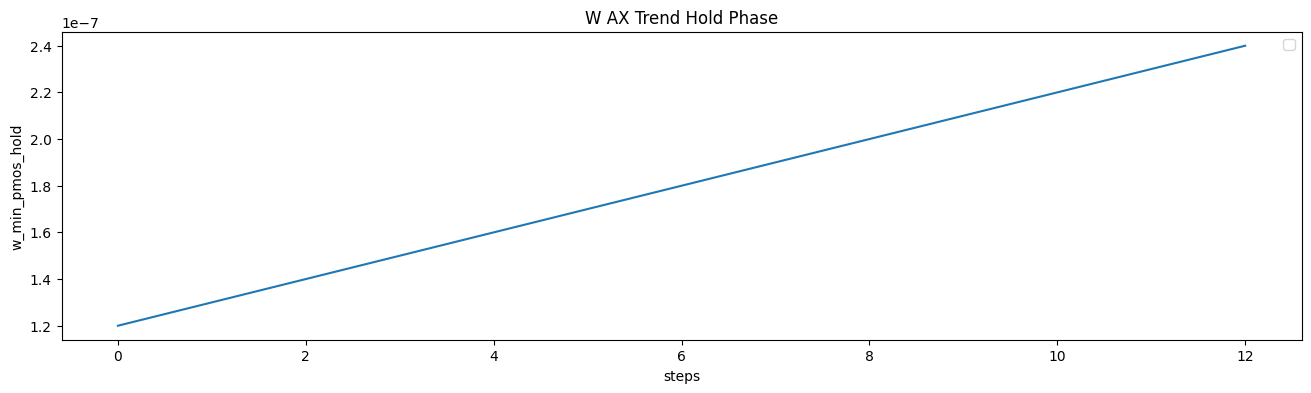

In [4]:
standard_hold_log_file_path = f"./{standard_hold_log}"

with open(standard_hold_log_file_path, "r") as file:
    content = file.read()


w_ax_standard_hold_data = re.search(w_ax_standard_pattern, content, re.DOTALL).group(1)
w_ax_standard_hold_lines = w_ax_standard_hold_data.strip().split('\n')[1:]
w_ax_standard_hold = [float(line.split('\t')[1]) for line in w_ax_standard_hold_lines]

print(f'w_ax_standard_hold = {w_ax_standard_hold}')
plt.figure(figsize=(16, 4))
plt.legend(['w_ax_standard_hold'])
plt.plot(w_ax_standard_hold, label='w_ax_standard_hold')
plt.ylabel('w_min_pmos_hold'); plt.xlabel('steps'); plt.title('W AX Trend Hold Phase')
w_ax_standard_hold_path_image = os.path.join(images, "w_ax_standard_hold.png")
check_output_image(w_ax_standard_hold_path_image)
plt.savefig(w_ax_standard_hold_path_image)
plt.show()

snm_standard_hold = 262.43550473079256
File updated successfully: ../../images/butterfly_curve_standard_hold.png


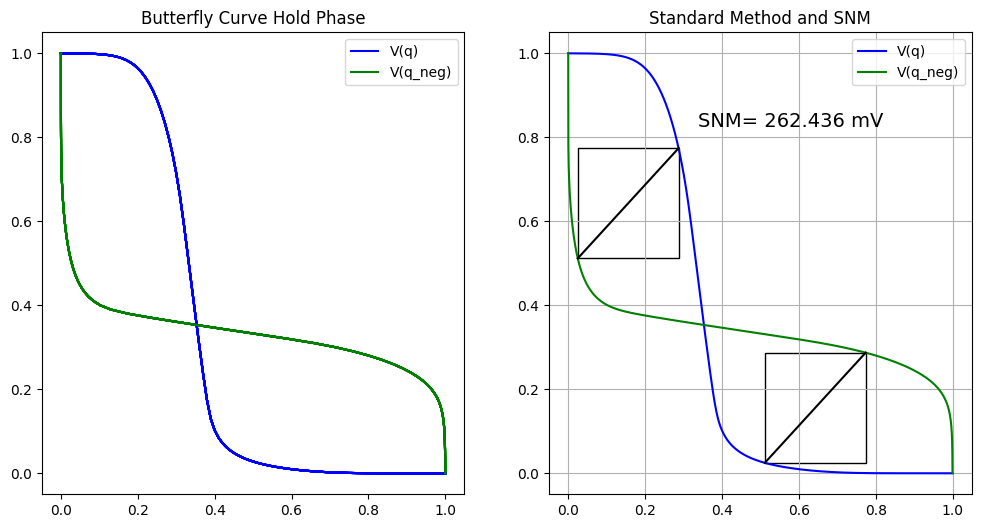

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
x_vq_standard_hold = []
vq_standard_hold = []
x_vqneg_standard_hold = []
vqneg_standard_hold = []
for step in range(len(steps)):
    x = vsweep_standard_hold.get_wave(step)
    vq = v_q_standard_hold.get_wave(step)
    x_vq_standard_hold.append(x)
    vq_standard_hold.append(vq)
    x_vqneg_standard_hold.append(vq)
    vqneg_standard_hold.append(x)
    axs[0].plot(x, vq, label=steps[step], color='blue')
    axs[0].plot(vq, x, label=steps[step], color='green')
axs[0].set_title("Butterfly Curve Hold Phase")
axs[0].legend(["V(q)", "V(q_neg)"])


snm_standard_hold = standard_processing(x_vq=x_vq_standard_hold[w_ax_pos], vq=vq_standard_hold[w_ax_pos], x_vqneg=x_vqneg_standard_hold[w_ax_pos], vqneg=vqneg_standard_hold[w_ax_pos], ax=axs[1])
print(f'snm_standard_hold = {snm_standard_hold}')

butterfly_curve_standard_hold_path_image = os.path.join(images, "butterfly_curve_standard_hold.png")
check_output_image(butterfly_curve_standard_hold_path_image)
plt.savefig(butterfly_curve_standard_hold_path_image)
plt.show()

<h3>Read Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/standard/read/standard_read.asc


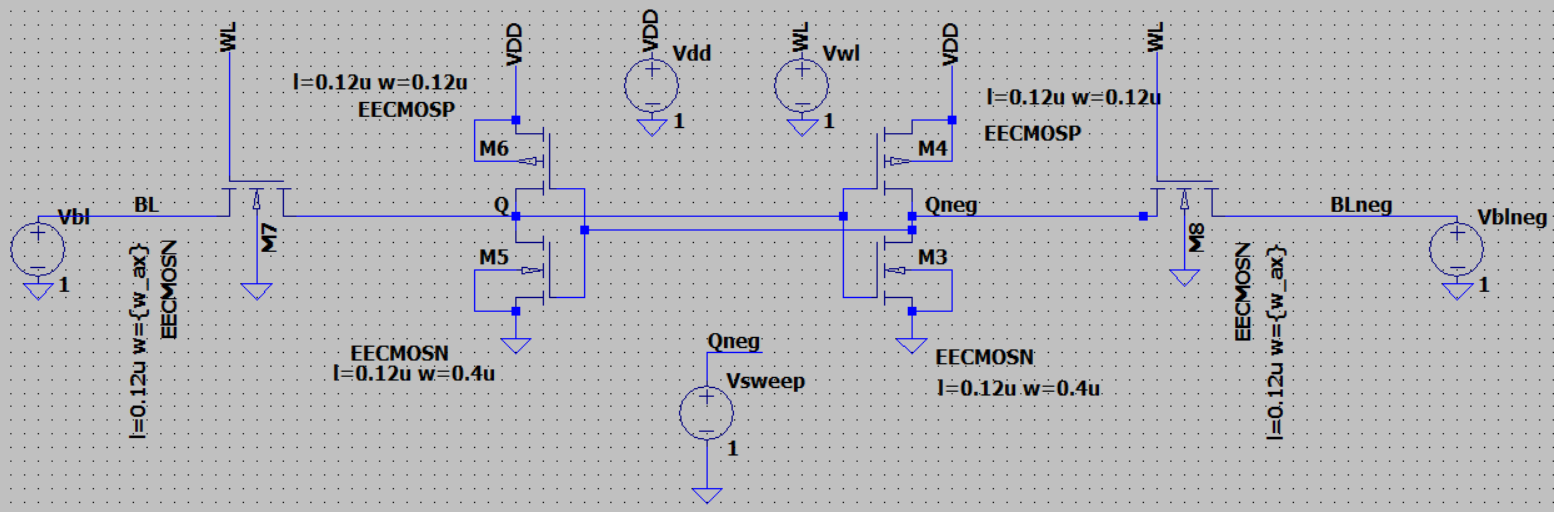

Successful/Total Simulations: 0/1
Raw file: data\standard\read\standard_read_1.raw, Log file: data\standard\read\standard_read_1.log
File opened successfully: data\standard\read\standard_read_1.raw
File updated successfully: ../../images/standard_read_simulation.png


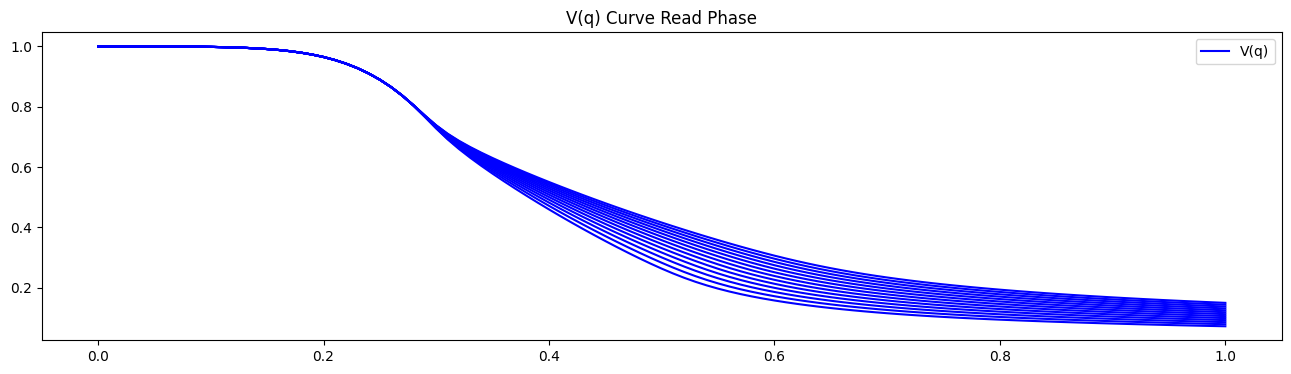

In [6]:
standard_read_netlist = load_asc(
                                     asc_file_path=os.path.join(ltspice, "standard/read/standard_read.asc"),
                                     schematic_image_path=os.path.join(schematics, "standard.png")
                                     )
vwl=vwl_read; vbl=vbl_read; vblneg=vblneg_read
standard_read_netlist.set_parameter('l_ax', l_ax_standard)
standard_read_netlist.set_parameter('l_pmos_q', l_pmos_q_standard)
standard_read_netlist.set_parameter('w_pmos_q', w_pmos_q_standard)
standard_read_netlist.set_parameter('l_nmos_q', l_nmos_q_standard)
standard_read_netlist.set_parameter('w_nmos_q', w_nmos_q_standard)
standard_read_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_standard)
standard_read_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_standard)
standard_read_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_standard)
standard_read_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_standard)
standard_read_netlist.set_parameter('vdd', vdd_standard)
standard_read_netlist.set_parameter('vwl', vwl)
standard_read_netlist.set_parameter('vbl', vbl)
standard_read_netlist.set_parameter('vblneg', vblneg)
standard_read_netlist.set_parameter('vsweep', vsweep_standard)
standard_read_netlist.add_instructions(
                                        rit_models,
                                        dc_vsweep_standard,
                                        w_ax_step_param_standard,
                                        save_w_ax_standard
                                    )
standard_read_runner = SimRunner(output_folder=f"{data}/standard/read/")
standard_read_runner.run(netlist=standard_read_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(standard_read_runner.okSim) + '/' + str(standard_read_runner.runno))

standard_read_raw = ""
standard_read_log = ""
for standard_read_raw, standard_read_log in standard_read_runner:
    print("Raw file: %s, Log file: %s" % (standard_read_raw, standard_read_log))

standard_read_ltr = load_ltr(raw_file_path=standard_read_raw)
v_q_standard_read = standard_read_ltr.get_trace("V(q)")
vsweep_standard_read = standard_read_ltr.get_trace('vsweep')
steps = standard_read_ltr.get_steps()

plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    x = vsweep_standard_read.get_wave(step)
    vq = v_q_standard_read.get_wave(step)
    plt.plot(x, vq, label=steps[step], color='blue')
plt.title("V(q) Curve Read Phase")
plt.legend(["V(q)"])
standard_read_simulation_path_image = os.path.join(images, "standard_read_simulation.png")
check_output_image(standard_read_simulation_path_image)
plt.savefig(standard_read_simulation_path_image)
plt.show()

w_ax_standard_read = [1.2e-07, 1.3e-07, 1.4e-07, 1.5e-07, 1.6e-07, 1.7e-07, 1.8e-07, 1.9e-07, 2e-07, 2.1e-07, 2.2e-07, 2.3e-07, 2.4e-07]
File updated successfully: ../../images/w_ax_standard_read.png


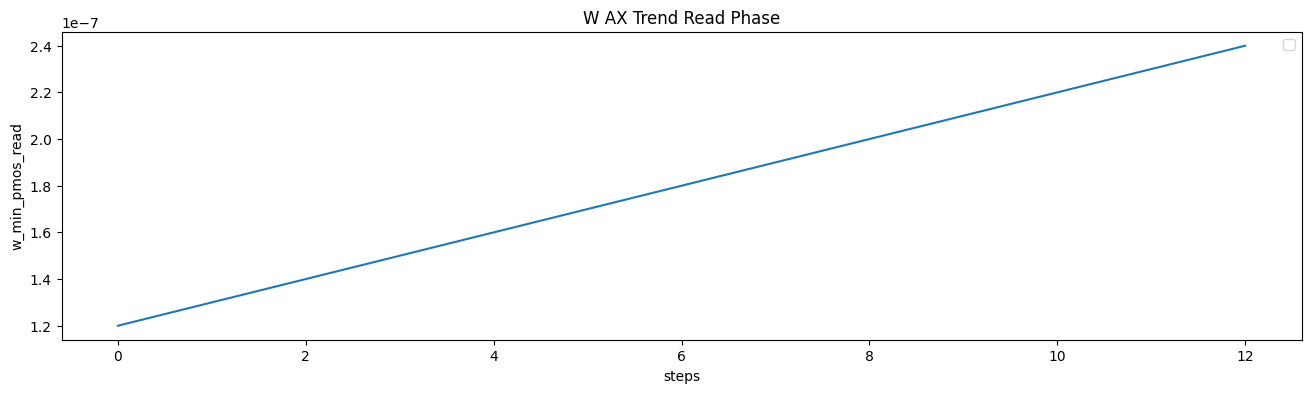

In [7]:
standard_read_log_file_path = f"./{standard_read_log}"

with open(standard_read_log_file_path, "r") as file:
    content = file.read()


w_ax_standard_read_data = re.search(w_ax_standard_pattern, content, re.DOTALL).group(1)
w_ax_standard_read_lines = w_ax_standard_read_data.strip().split('\n')[1:]
w_ax_standard_read = [float(line.split('\t')[1]) for line in w_ax_standard_read_lines]

print(f'w_ax_standard_read = {w_ax_standard_read}')
plt.figure(figsize=(16, 4))
plt.legend(['w_ax_standard_read'])
plt.plot(w_ax_standard_read, label='w_ax_standard_read')
plt.ylabel('w_min_pmos_read'); plt.xlabel('steps'); plt.title('W AX Trend Read Phase')
w_ax_standard_read_path_image = os.path.join(images, "w_ax_standard_read.png")
check_output_image(w_ax_standard_read_path_image)
plt.savefig(w_ax_standard_read_path_image)
plt.show()

snm_standard_read = 141.84301463106343
File updated successfully: ../../images/butterfly_curve_standard_read.png


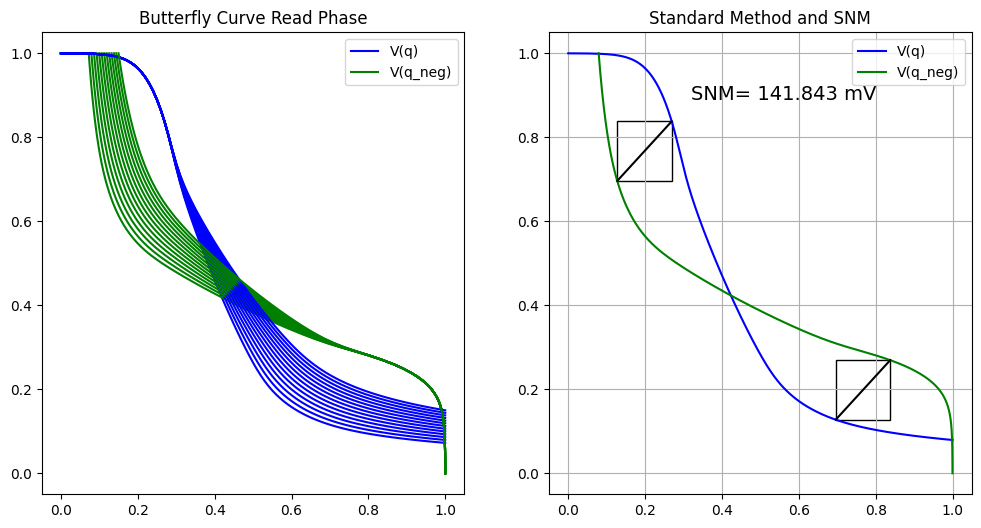

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
x_vq_standard_read = []
vq_standard_read = []
x_vqneg_standard_read = []
vqneg_standard_read = []
for step in range(len(steps)):
    x = vsweep_standard_read.get_wave(step)
    vq = v_q_standard_read.get_wave(step)
    x_vq_standard_read.append(x)
    vq_standard_read.append(vq)
    x_vqneg_standard_read.append(vq)
    vqneg_standard_read.append(x)
    axs[0].plot(vsweep_standard_read.get_wave(step), v_q_standard_read.get_wave(step), label=steps[step], color='blue')
    axs[0].plot(v_q_standard_read.get_wave(step), vsweep_standard_read.get_wave(step), label=steps[step], color='green')
axs[0].set_title("Butterfly Curve Read Phase")
axs[0].legend(["V(q)", "V(q_neg)"])

snm_standard_read = standard_processing(x_vq=x_vq_standard_read[w_ax_pos], vq=vq_standard_read[w_ax_pos], x_vqneg=x_vqneg_standard_read[w_ax_pos], vqneg=vqneg_standard_read[w_ax_pos], ax=axs[1])
print(f'snm_standard_read = {snm_standard_read}')

butterfly_curve_standard_read_path_image = os.path.join(images, "butterfly_curve_standard_read.png")
check_output_image(butterfly_curve_standard_read_path_image)
plt.savefig(butterfly_curve_standard_read_path_image)
plt.show()

<h2>SNM Seevinck Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/seevinck/hold/seevinck_hold.asc


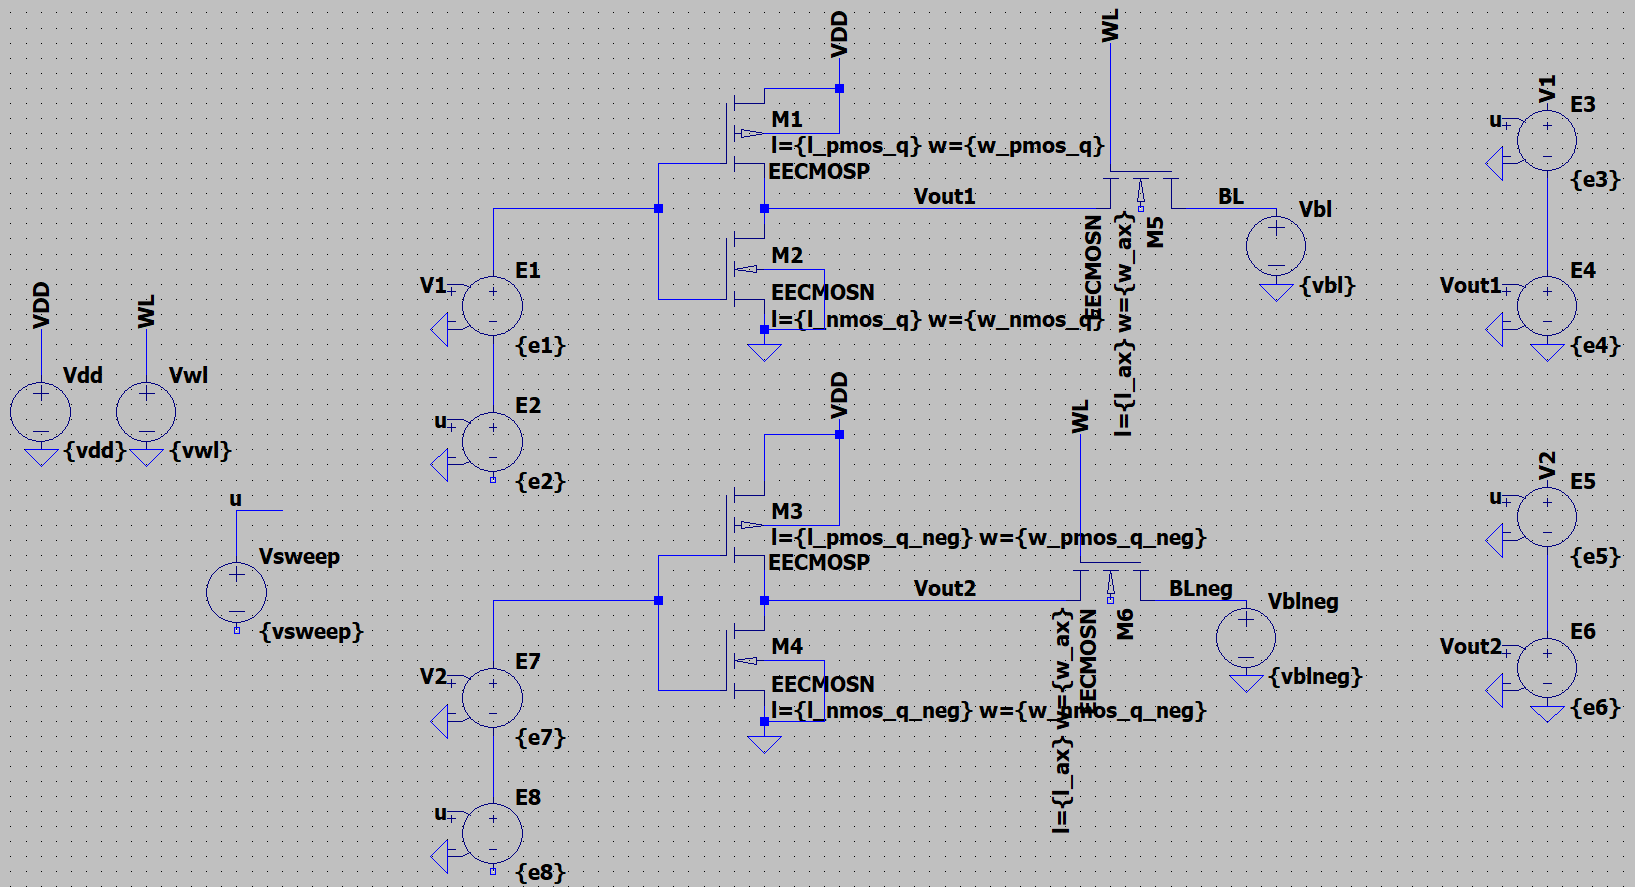

Successful/Total Simulations: 0/1
Raw file: data\seevinck\hold\seevinck_hold_1.raw, Log file: data\seevinck\hold\seevinck_hold_1.log
File opened successfully: data\seevinck\hold\seevinck_hold_1.raw
File updated successfully: ../../images/seevinck_hold_simulation.png


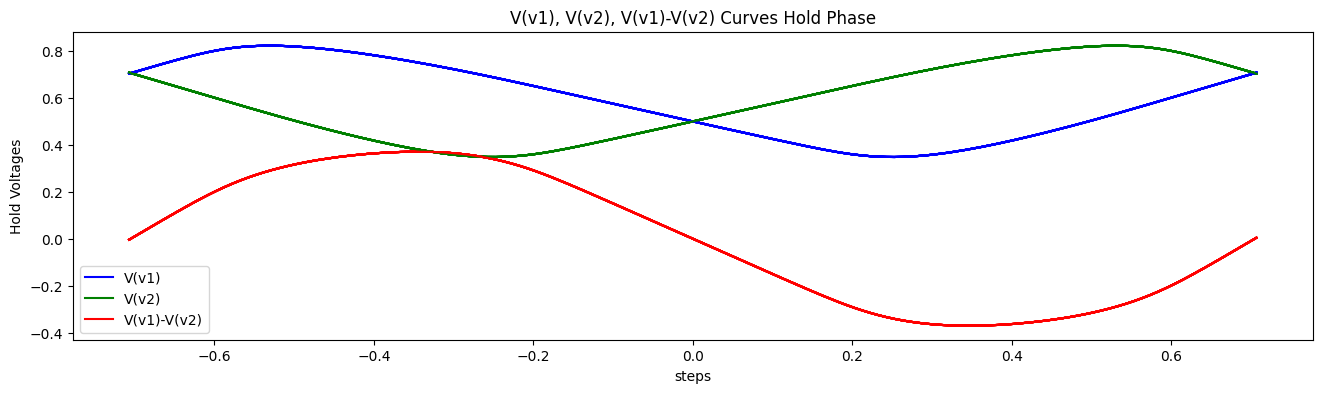

w_ax                 SNM_MAX(HOLD)                  SNM_MIN(HOLD)                 
1.2e-07 u            261.875 mV                     -261.859 mV                   
1.3e-07 u            261.875 mV                     -261.859 mV                   
1.4e-07 u            261.875 mV                     -261.859 mV                   
1.5e-07 u            261.875 mV                     -261.859 mV                   
1.6e-07 u            261.875 mV                     -261.859 mV                   
1.7e-07 u            261.875 mV                     -261.859 mV                   
1.8e-07 u            261.875 mV                     -261.859 mV                   
1.9e-07 u            261.875 mV                     -261.858 mV                   
2e-07 u              261.875 mV                     -261.858 mV                   
2.1e-07 u            261.874 mV                     -261.858 mV                   
2.2e-07 u            261.874 mV                     -261.858 mV                   
2.3e

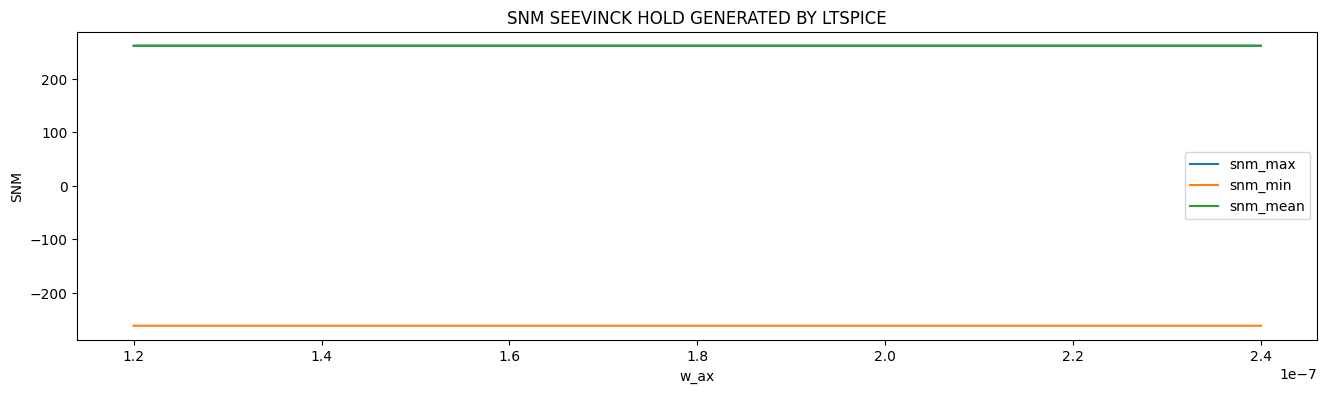

File updated successfully: ../../images/seevinck_hold_snm_ltspice.png


<Figure size 640x480 with 0 Axes>

In [9]:
seevinck_hold_netlist = load_asc(
                                asc_file_path=os.path.join(ltspice, "seevinck/hold/seevinck_hold.asc"),
                                schematic_image_path=os.path.join(schematics, "seevinck.png")
                                )
vwl=vwl_hold; vbl=vbl_hold; vblneg=vblneg_hold
seevinck_hold_netlist.set_parameter('l_ax', l_ax_seevinck)
seevinck_hold_netlist.set_parameter('l_pmos_q', l_pmos_q_seevinck)
seevinck_hold_netlist.set_parameter('w_pmos_q', w_pmos_q_seevinck)
seevinck_hold_netlist.set_parameter('l_nmos_q', l_nmos_q_seevinck)
seevinck_hold_netlist.set_parameter('w_nmos_q', w_nmos_q_seevinck)
seevinck_hold_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_seevinck)
seevinck_hold_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_seevinck)
seevinck_hold_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_seevinck)
seevinck_hold_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_seevinck)
seevinck_hold_netlist.set_parameter('vdd', vdd_seevinck)
seevinck_hold_netlist.set_parameter('vwl', vwl)
seevinck_hold_netlist.set_parameter('vbl', vbl)
seevinck_hold_netlist.set_parameter('vblneg', vblneg)
seevinck_hold_netlist.set_parameter('vsweep', vsweep_seevinck)
seevinck_hold_netlist.set_parameter('e1', e1_seevinck)
seevinck_hold_netlist.set_parameter('e2', e2_seevinck)
seevinck_hold_netlist.set_parameter('e3', e3_seevinck)
seevinck_hold_netlist.set_parameter('e4', e4_seevinck)
seevinck_hold_netlist.set_parameter('e5', e5_seevinck)
seevinck_hold_netlist.set_parameter('e6', e6_seevinck)
seevinck_hold_netlist.set_parameter('e7', e7_seevinck)
seevinck_hold_netlist.set_parameter('e8', e8_seevinck)
seevinck_hold_netlist.add_instructions(
                                        rit_models,
                                        dc_vsweep_seevinck,
                                        snm_max,
                                        snm_min,
                                        w_ax_step_param_seevinck,
                                        save_w_ax_seevinck
                                    )
seevinck_hold_runner = SimRunner(output_folder=f"{data}/seevinck/hold/")
seevinck_hold_runner.run(netlist=seevinck_hold_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(seevinck_hold_runner.okSim) + '/' + str(seevinck_hold_runner.runno))

seevinck_hold_raw = ""
seevinck_hold_log = ""
for seevinck_hold_raw, seevinck_hold_log in seevinck_hold_runner:
    print("Raw file: %s, Log file: %s" % (seevinck_hold_raw, seevinck_hold_log))

seevinck_hold_ltr = load_ltr(raw_file_path=seevinck_hold_raw)
v_1_seevinck_hold = seevinck_hold_ltr.get_trace("V(v1)")
v_2_seevinck_hold = seevinck_hold_ltr.get_trace("V(v2)")
vsweep_seevinck_hold = seevinck_hold_ltr.get_trace('vsweep')
steps = seevinck_hold_ltr.get_steps()

plt.figure(figsize=(16, 4))
vq_seevinck_hold = []
vqneg_seevinck_hold = []
vq_vqneg_seevinck_hold = []
x_seevinck_hold = []
for step in range(len(steps)):
    vq = v_1_seevinck_hold.get_wave(step)
    vqneg = v_2_seevinck_hold.get_wave(step)
    vq_minus_vqneg = vq - vqneg
    vq_seevinck_hold.append(vq)
    vqneg_seevinck_hold.append(vqneg)
    vq_vqneg_seevinck_hold.append(vq_minus_vqneg)
    x = vsweep_seevinck_hold.get_wave(step)
    x_seevinck_hold.append(x)
    plt.plot(x, vq, label=steps[step], color='blue')
    plt.plot(x, vqneg, label=steps[step], color='green')
    plt.plot(x, vq_minus_vqneg, label=steps[step], color='red')
plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Hold Phase")
plt.xlabel("steps"); plt.ylabel("Hold Voltages")
plt.legend(["V(v1)", "V(v2)", "V(v1)-V(v2)"])
seevinck_hold_simulation_path_image = os.path.join(images, "seevinck_hold_simulation.png")
check_output_image(seevinck_hold_simulation_path_image)
plt.savefig(seevinck_hold_simulation_path_image)
plt.show()


seevinck_hold_log_file_path = f"./{seevinck_hold_log}"
with open(seevinck_hold_log_file_path, "r") as file:
    content = file.read()

w_ax_seevinck_hold_data = re.search(w_ax_seevinck_pattern, content, re.DOTALL).group(1)
w_ax_seevinck_hold_lines = w_ax_seevinck_hold_data.strip().split('\n')[1:]
w_ax_seevinck_hold = [float(line.split('\t')[1]) for line in w_ax_seevinck_hold_lines]

snm_max_seevinck_hold_data = re.search(snm_max_seevinck_pattern, content, re.DOTALL).group(1)
snm_max_seevinck_hold_lines = snm_max_seevinck_hold_data.strip().split('\n')[1:]
snm_max_seevinck_hold = [float(line.split('\t')[1]) for line in snm_max_seevinck_hold_lines]
snm_max_seevinck_hold = [1000 * snm_max for snm_max in snm_max_seevinck_hold]

snm_min_seevinck_hold_data = re.search(snm_min_seevinck_pattern, content, re.DOTALL).group(1)
snm_min_seevinck_hold_lines = snm_min_seevinck_hold_data.strip().split('\n')[1:]
snm_min_seevinck_hold = [float(line.split('\t')[1]) for line in snm_min_seevinck_hold_lines]
snm_min_seevinck_hold = [1000 * snm_min for snm_min in snm_min_seevinck_hold]

print("{:<20} {:<30} {:<30}".format("w_ax", "SNM_MAX(HOLD)", "SNM_MIN(HOLD)"))
snm_mean_seevinck_hold = []
for w_ax, snm_max, snm_min in zip(w_ax_seevinck_hold, snm_max_seevinck_hold, snm_min_seevinck_hold):
    snm_mean = (snm_max + abs(snm_min)) / 2
    print("{:<20} {:<30} {:<30}".format(f'{w_ax} u', f'{snm_max} mV', f'{snm_min} mV'))
    snm_mean_seevinck_hold.append(snm_mean)
print(f'snm_mean_seevinck_hold = {mean(snm_mean_seevinck_hold)}')

plt.figure(figsize=(16, 4))
plt.plot(w_ax_seevinck_hold, snm_max_seevinck_hold)
plt.plot(w_ax_seevinck_hold, snm_min_seevinck_hold)
plt.plot(w_ax_seevinck_hold, snm_mean_seevinck_hold)
plt.xlabel("w_ax"); plt.ylabel("SNM")
plt.legend(["snm_max","snm_min", "snm_mean"])
plt.title("SNM SEEVINCK HOLD GENERATED BY LTSPICE")
plt.show()
seevinck_hold_snm_ltspice_path_image = os.path.join(images, "seevinck_hold_snm_ltspice.png")
check_output_image(seevinck_hold_snm_ltspice_path_image)
plt.savefig(seevinck_hold_snm_ltspice_path_image)
plt.show()

snm_seevinck_hold_seevinck_processing = 261.9149308688862
snm_seevinck_hold_standard_processing = 261.9878941702367
File updated successfully: ../../images/v1_minus_v2_seevinck_hold.png


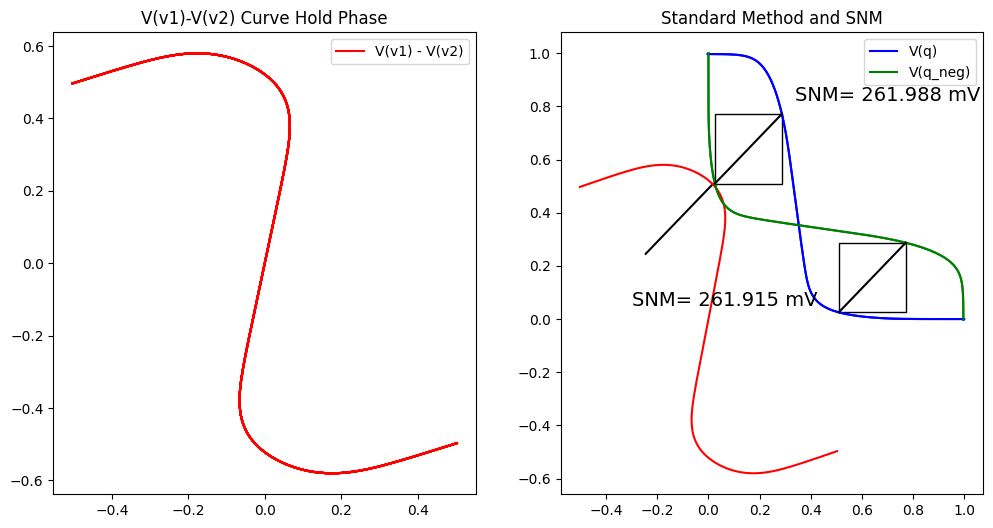

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# vq-vqneg rotating
for vq_array, vqneg_array in zip(vq_seevinck_hold, vqneg_seevinck_hold):
    vq_vqneg_array = vq_array - vqneg_array
    x_diff, y_diff = rotate_points(x_seevinck_hold[w_ax_pos], vq_vqneg_array, -45)
    axs[0].plot(x_diff, y_diff, color='red')
axs[0].set_title("V(v1)-V(v2) Curve Hold Phase")
axs[0].legend(["V(v1) - V(v2)"])

# vq and vqneg rotating
xshold1, yshold1 = rotate_points(x_seevinck_hold[w_ax_pos], vq_seevinck_hold[w_ax_pos], -45)
xshold2, yshold2 = rotate_points(x_seevinck_hold[w_ax_pos], vqneg_seevinck_hold[w_ax_pos], -45)
axs[1].plot(xshold1, yshold1, color='blue')
axs[1].plot(xshold2, yshold2, color='green')

# seevinck processing
snm_seevinck_hold, x_snm_start, y_snm_start = seevinck_processing(x_v1_minus_v2=x_seevinck_hold[w_ax_pos], v1_minus_v2=vq_vqneg_seevinck_hold[w_ax_pos], ax=axs[1])
snm_seevinck_hold = (1/sqrt(2)) * snm_seevinck_hold
axs[1].text(x_snm_start + 0.05, y_snm_start + 0.05, 'SNM= %.3f mV' % snm_seevinck_hold, fontsize=14)
axs[1].set_title("V(v1)-V(v2) Curve Hold Phase and SNM")
print(f'snm_seevinck_hold_seevinck_processing = {snm_seevinck_hold}')

# standard processing
snm_seevinck_hold = standard_processing(x_vq=xshold1, vq=yshold1, x_vqneg=xshold2, vqneg=yshold2, ax=axs[1])
print(f'snm_seevinck_hold_standard_processing = {snm_seevinck_hold}')

v1_minus_v2_seevinck_hold_path_image = os.path.join(images, "v1_minus_v2_seevinck_hold.png")
check_output_image(v1_minus_v2_seevinck_hold_path_image)
plt.savefig(v1_minus_v2_seevinck_hold_path_image)
plt.show()

<h3>Read Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/seevinck/read/seevinck_read.asc


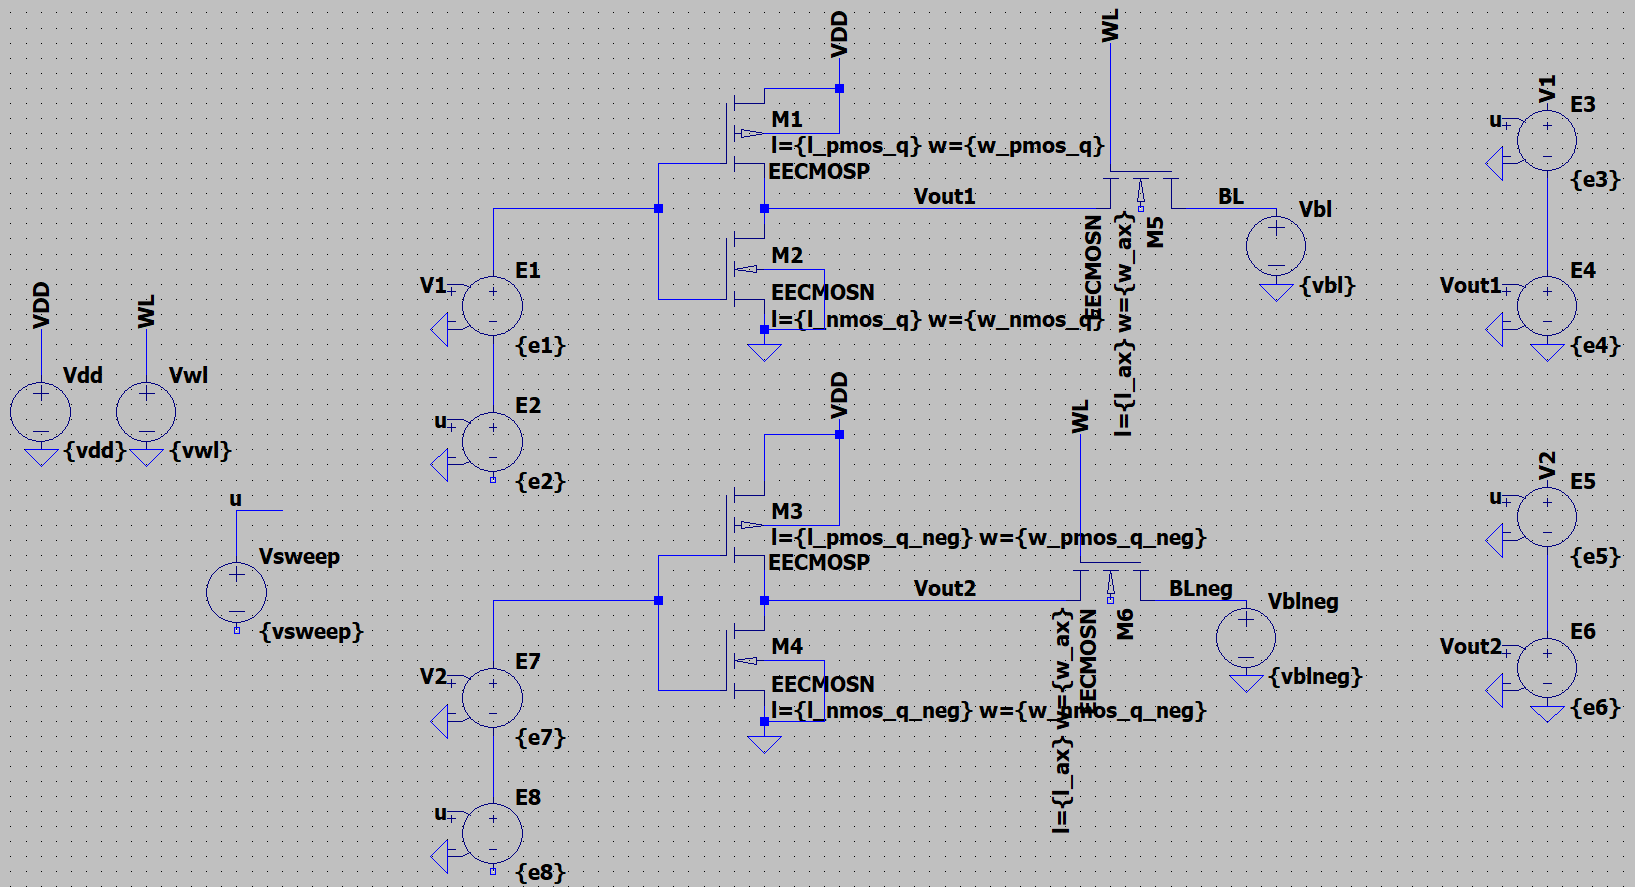

AttributeError: 'float' object has no attribute 'endswith'

In [11]:
seevinck_read_netlist = load_asc(
                                asc_file_path=os.path.join(ltspice, "seevinck/read/seevinck_read.asc"),
                                schematic_image_path=os.path.join(schematics, "seevinck.png")
                                )
vwl=vwl_read; vbl=vbl_read; vblneg=vblneg_read
seevinck_read_netlist.set_parameter('l_ax', l_ax_seevinck)
seevinck_read_netlist.set_parameter('l_pmos_q', l_pmos_q_seevinck)
seevinck_read_netlist.set_parameter('w_pmos_q', w_pmos_q_seevinck)
seevinck_read_netlist.set_parameter('l_nmos_q', l_nmos_q_seevinck)
seevinck_read_netlist.set_parameter('w_nmos_q', w_nmos_q_seevinck)
seevinck_read_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_seevinck)
seevinck_read_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_seevinck)
seevinck_read_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_seevinck)
seevinck_read_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_seevinck)
seevinck_read_netlist.set_parameter('vdd', vdd_seevinck)
seevinck_read_netlist.set_parameter('vwl', vwl)
seevinck_read_netlist.set_parameter('vbl', vbl)
seevinck_read_netlist.set_parameter('vblneg', vblneg)
seevinck_read_netlist.set_parameter('vsweep', vsweep_seevinck)
seevinck_read_netlist.set_parameter('e1', e1_seevinck)
seevinck_read_netlist.set_parameter('e2', e2_seevinck)
seevinck_read_netlist.set_parameter('e3', e3_seevinck)
seevinck_read_netlist.set_parameter('e4', e4_seevinck)
seevinck_read_netlist.set_parameter('e5', e5_seevinck)
seevinck_read_netlist.set_parameter('e6', e6_seevinck)
seevinck_read_netlist.set_parameter('e7', e7_seevinck)
seevinck_read_netlist.set_parameter('e8', e8_seevinck)
seevinck_read_netlist.add_instructions(
                                        rit_models,
                                        dc_vsweep_seevinck,
                                        snm_max,
                                        snm_min,
                                        w_ax_step_param_seevinck,
                                        save_w_ax_seevinck
                                    )
seevinck_read_runner = SimRunner(output_folder=f"{data}/seevinck/read/")
seevinck_read_runner.run(netlist=seevinck_read_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(seevinck_read_runner.okSim) + '/' + str(seevinck_read_runner.runno))

seevinck_read_raw = ""
seevinck_read_log = ""
for seevinck_read_raw, seevinck_read_log in seevinck_read_runner:
    print("Raw file: %s, Log file: %s" % (seevinck_read_raw, seevinck_read_log))

seevinck_read_ltr = load_ltr(raw_file_path=seevinck_read_raw)
v_1_seevinck_read = seevinck_read_ltr.get_trace("V(v1)")
v_2_seevinck_read = seevinck_read_ltr.get_trace("V(v2)")
vsweep_seevinck_read = seevinck_read_ltr.get_trace('vsweep')
steps = seevinck_read_ltr.get_steps()

plt.figure(figsize=(16, 4))
vq_seevinck_read = []
vqneg_seevinck_read = []
vq_vqneg_seevinck_read = []
x_seevinck_read = []
for step in range(len(steps)):
    vq = v_1_seevinck_read.get_wave(step)
    vqneg = v_2_seevinck_read.get_wave(step)
    vq_minus_vqneg = vq - vqneg
    vq_seevinck_read.append(vq)
    vqneg_seevinck_read.append(vqneg)
    vq_vqneg_seevinck_read.append(vq_minus_vqneg)
    x = vsweep_seevinck_read.get_wave(step)
    x_seevinck_read.append(x)
    plt.plot(x, vq, label=steps[step], color='blue')
    plt.plot(x, vqneg, label=steps[step], color='green')
    plt.plot(x, vq_minus_vqneg, label=steps[step], color='red')
plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Read Phase")
plt.xlabel("steps"); plt.ylabel("Read Voltages")
plt.legend(["V(1)", "V(v2)", "V(v1)-V(v2)"])
seevinck_read_simulation_path_image = os.path.join(images, "seevinck_read_simulation.png")
check_output_image(seevinck_read_simulation_path_image)
plt.savefig(seevinck_read_simulation_path_image)
plt.show()


seevinck_read_log_file_path = f"./{seevinck_read_log}"
with open(seevinck_read_log_file_path, "r") as file:
    content = file.read()

w_ax_seevinck_read_data = re.search(w_ax_seevinck_pattern, content, re.DOTALL).group(1)
w_ax_seevinck_read_lines = w_ax_seevinck_read_data.strip().split('\n')[1:]
w_ax_seevinck_read = [float(line.split('\t')[1]) for line in w_ax_seevinck_read_lines]

snm_max_seevinck_read_data = re.search(snm_max_seevinck_pattern, content, re.DOTALL).group(1)
snm_max_seevinck_read_lines = snm_max_seevinck_read_data.strip().split('\n')[1:]
snm_max_seevinck_read = [float(line.split('\t')[1]) for line in snm_max_seevinck_read_lines]
snm_max_seevinck_read = [1000 * snm_max for snm_max in snm_max_seevinck_read]

snm_min_seevinck_read_data = re.search(snm_min_seevinck_pattern, content, re.DOTALL).group(1)
snm_min_seevinck_read_lines = snm_min_seevinck_read_data.strip().split('\n')[1:]
snm_min_seevinck_read = [float(line.split('\t')[1]) for line in snm_min_seevinck_read_lines]
snm_min_seevinck_read = [1000 * snm_min for snm_min in snm_min_seevinck_read]

print("{:<20} {:<30} {:<30}".format("w_ax", "SNM_MAX(READ)", "SNM_MIN(READ)"))
snm_mean_seevinck_read = []
for w_ax, snm_max, snm_min in zip(w_ax_seevinck_read, snm_max_seevinck_read, snm_min_seevinck_read):
    snm_mean = (snm_max + abs(snm_min)) / 2
    print("{:<20} {:<30} {:<30}".format(f'{w_ax} u', f'{snm_max} mV', f'{snm_min} mV'))
    snm_mean_seevinck_read.append(snm_mean)
print(f'snm_mean_seevinck_read = {mean(snm_mean_seevinck_read)}')


plt.figure(figsize=(16, 4))
plt.plot(w_ax_seevinck_read, snm_max_seevinck_read)
plt.plot(w_ax_seevinck_read, snm_min_seevinck_read)
plt.plot(w_ax_seevinck_read, snm_mean_seevinck_read)
plt.xlabel("w_ax"); plt.ylabel("SNM")
plt.legend(["snm_max","snm_min", "snm_mean"])
plt.title("SNM SEEVINCK READ GENERATED BY LTSPICE")
plt.show()
seevinck_read_snm_ltspice_path_image = os.path.join(images, "seevinck_read_snm_ltspice.png")
check_output_image(seevinck_read_snm_ltspice_path_image)
plt.savefig(seevinck_read_snm_ltspice_path_image)
plt.show()

w_ax       SNM(READ)                     
0.12 u     153.5218766028115 mV          
0.13 u     145.53129774047963 mV         
0.14 u     137.83646331414866 mV         
0.15 u     130.41558340313856 mV         
0.16 u     123.250408422044 mV           
0.17 u     116.3341527282548 mV          
0.18 u     109.6461643660006 mV          
0.19 u     106.2860911621666 mV          
0.20 u     111.29440117071614 mV         
0.21 u     116.20707997999446 mV         
0.22 u     121.02712001624585 mV         
0.23 u     125.75734511832049 mV         
0.24 u     130.40049483137165 mV         
File not found: ../../images/seevinck_snm_read_trend.png
File created successfully: ../../images/seevinck_snm_read_trend.png


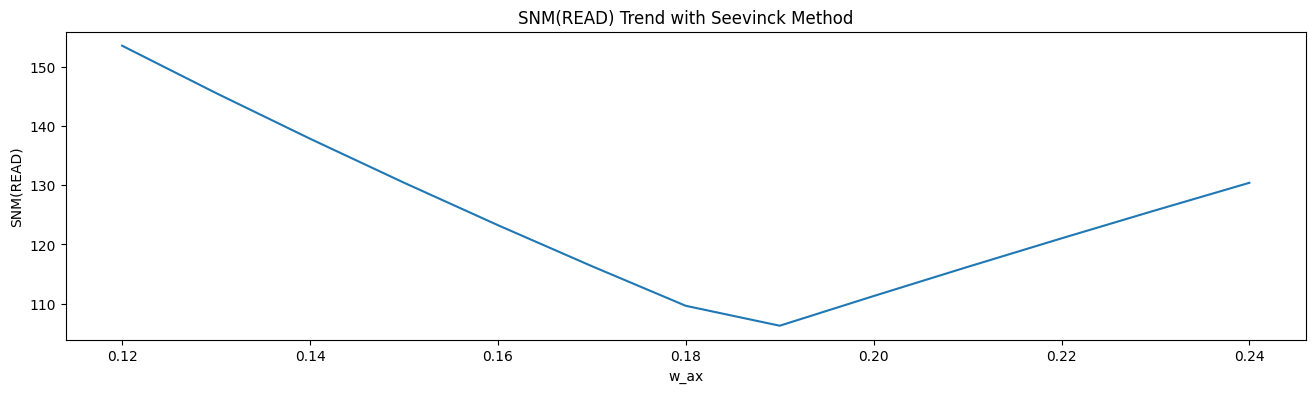

In [13]:
from properties import w_ax_start_seevinck, w_ax_step_seevinck

plt.figure(figsize=(16, 4))
print("{:<10} {:<30}".format("w_ax", "SNM(READ)"))

w_ax_start_seevinck = float(w_ax_start_seevinck.replace('u', ''))
w_ax_step_seevinck = float(w_ax_step_seevinck.replace('u', ''))
w_ax_seevinck_i_value = 0
w_ax_read_seevinck = []
snm_read_seevinck = []

for i_array, v1_minus_v2_array in enumerate(v1_minus_v2):
    v1_minus_v2_curr_array = abs(v1_minus_v2_array)
    w_ax_seevinck_curr_value = w_ax_start_seevinck + w_ax_seevinck_i_value
    w_ax_read_seevinck.append(w_ax_seevinck_curr_value)
    w_ax_seevinck_i_value = w_ax_seevinck_i_value + w_ax_step_seevinck
    formatted_w_ax_seevinck = "{:.2f}".format(w_ax_seevinck_curr_value)
    snm_read_curr = (1/sqrt(2)) * max(v1_minus_v2_curr_array)
    snm_read_curr = 1000 * snm_read_curr
    snm_read_seevinck.append(snm_read_curr)
    print("{:<10} {:<30}".format(f'{formatted_w_ax_seevinck} u', f'{snm_read_curr} mV'))
plt.plot(w_ax_read_seevinck, snm_read_seevinck)
plt.title("SNM(READ) Trend with Seevinck Method")
plt.xlabel("w_ax"); plt.ylabel("SNM(READ)")
seevinck_snm_read_trend_path_image = os.path.join(images, "seevinck_snm_read_trend.png")
check_output_image(seevinck_snm_read_trend_path_image)
plt.savefig(seevinck_snm_read_trend_path_image)
plt.show()

snm_seevinck_read = 145.53129774047963
File not found: ../../images/v1_minus_v2_seevinck_read.png
File created successfully: ../../images/v1_minus_v2_seevinck_read.png


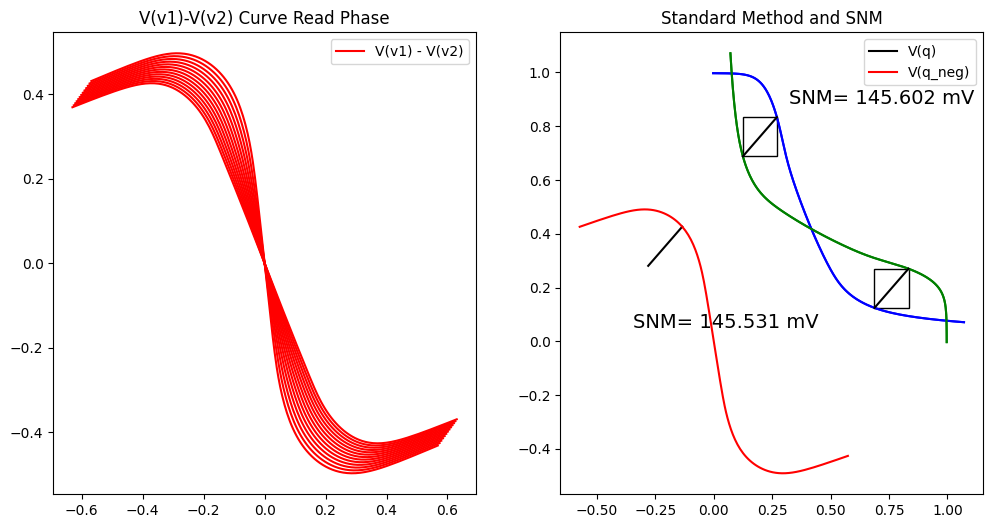

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
vq_seevinck_read = v1
vqneg_seevinck_read = v2
vq_vqneg_seevinck_read = vq_seevinck_read[w_ax_pick_pos_seevinck_read] - vqneg_seevinck_read[w_ax_pick_pos_seevinck_read]
for vq_array, vqneg_array in zip(vq_seevinck_read, vqneg_seevinck_read):
    vq_vqneg_array = vq_array - vqneg_array
    x_diff, y_diff = rotate_points(x_seevinck_read[w_ax_pick_pos_seevinck_read], vq_vqneg_array, -45)
    axs[0].plot(x_diff, y_diff, color='red')
axs[0].set_title("V(v1)-V(v2) Curve Read Phase")
axs[0].legend(["V(v1) - V(v2)"])

snm_seevinck_read, x_snm_start, y_snm_start = seevinck_processing(x_v1_minus_v2=x_seevinck_read[w_ax_pick_pos_seevinck_read], v1_minus_v2=vq_vqneg_seevinck_read, ax=axs[1])
snm_seevinck_read = (1/sqrt(2)) * snm_seevinck_read
axs[1].text(x_snm_start + 0.05, y_snm_start + 0.05, 'SNM= %.3f mV' % snm_seevinck_read, fontsize=14)
axs[1].set_title("V(v1)-V(v2) Curve Read Phase and SNM")
print(f'snm_seevinck_read = {snm_seevinck_read}')

w_ax_pick_pos_seevinck_hold = 1
x1, y1 = rotate_points(x_seevinck_hold[w_ax_pick_pos_seevinck_hold], v1[w_ax_pick_pos_seevinck_hold], -45)
x2, y2 = rotate_points(x_seevinck_hold[w_ax_pick_pos_seevinck_hold], v2[w_ax_pick_pos_seevinck_hold], -45)

axs[1].plot(x1, y1, color='blue')
axs[1].plot(x2, y2, color='green')
snm_seevinck_hold = standard_processing(x_vq=x1, vq=y1, x_vqneg=x2, vqneg=y2, ax=axs[1])

v1_minus_v2_seevinck_read_path_image = os.path.join(images, "v1_minus_v2_seevinck_read.png")
check_output_image(v1_minus_v2_seevinck_read_path_image)
plt.savefig(v1_minus_v2_seevinck_read_path_image)
plt.show()

snm_seevinck_read = [145.60160399]


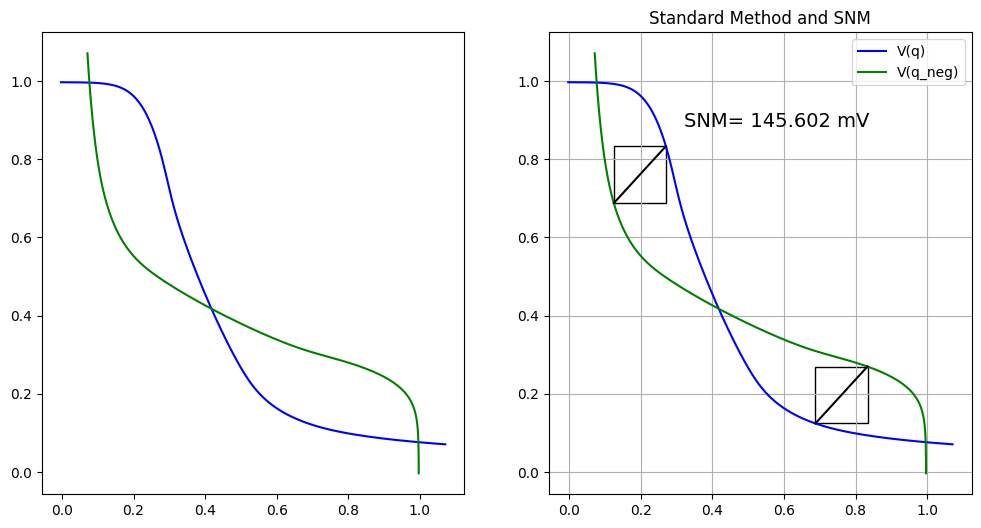

In [15]:
w_ax_pick_pos_seevinck_read = 1
x1, y1 = rotate_points(x_seevinck_read[w_ax_pick_pos_seevinck_read], v1[w_ax_pick_pos_seevinck_read], -45)
x2, y2 = rotate_points(x_seevinck_read[w_ax_pick_pos_seevinck_read], v2[w_ax_pick_pos_seevinck_read], -45)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(x1, y1, color='blue')
axs[0].plot(x2, y2, color='green')
snm_seevinck_read = standard_processing(x_vq=x1, vq=y1, x_vqneg=x2, vqneg=y2, ax=axs[1])
print(f'snm_seevinck_read = {snm_seevinck_read}')

plt.show()

<h2>Comparative Analysis between Standard Method and Seevinck Method</h2>

In [16]:
snm_hold_error = abs(snm_standard_hold - snm_max_seevinck_hold[w_ax_pick_pos_seevinck_hold])
print(f'snm_hold_error = {snm_hold_error}')

snm_read_error = abs(snm_standard_read - snm_max_seevinck_read[w_ax_pick_pos_seevinck_read])
print(f'snm_read_error = {snm_read_error}')

snm_hold_error = [0.56050473]
snm_read_error = [3.66598537]


<h2>Gaussian VTH Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/gaussian-vth/hold/gaussian_vth_hold.asc


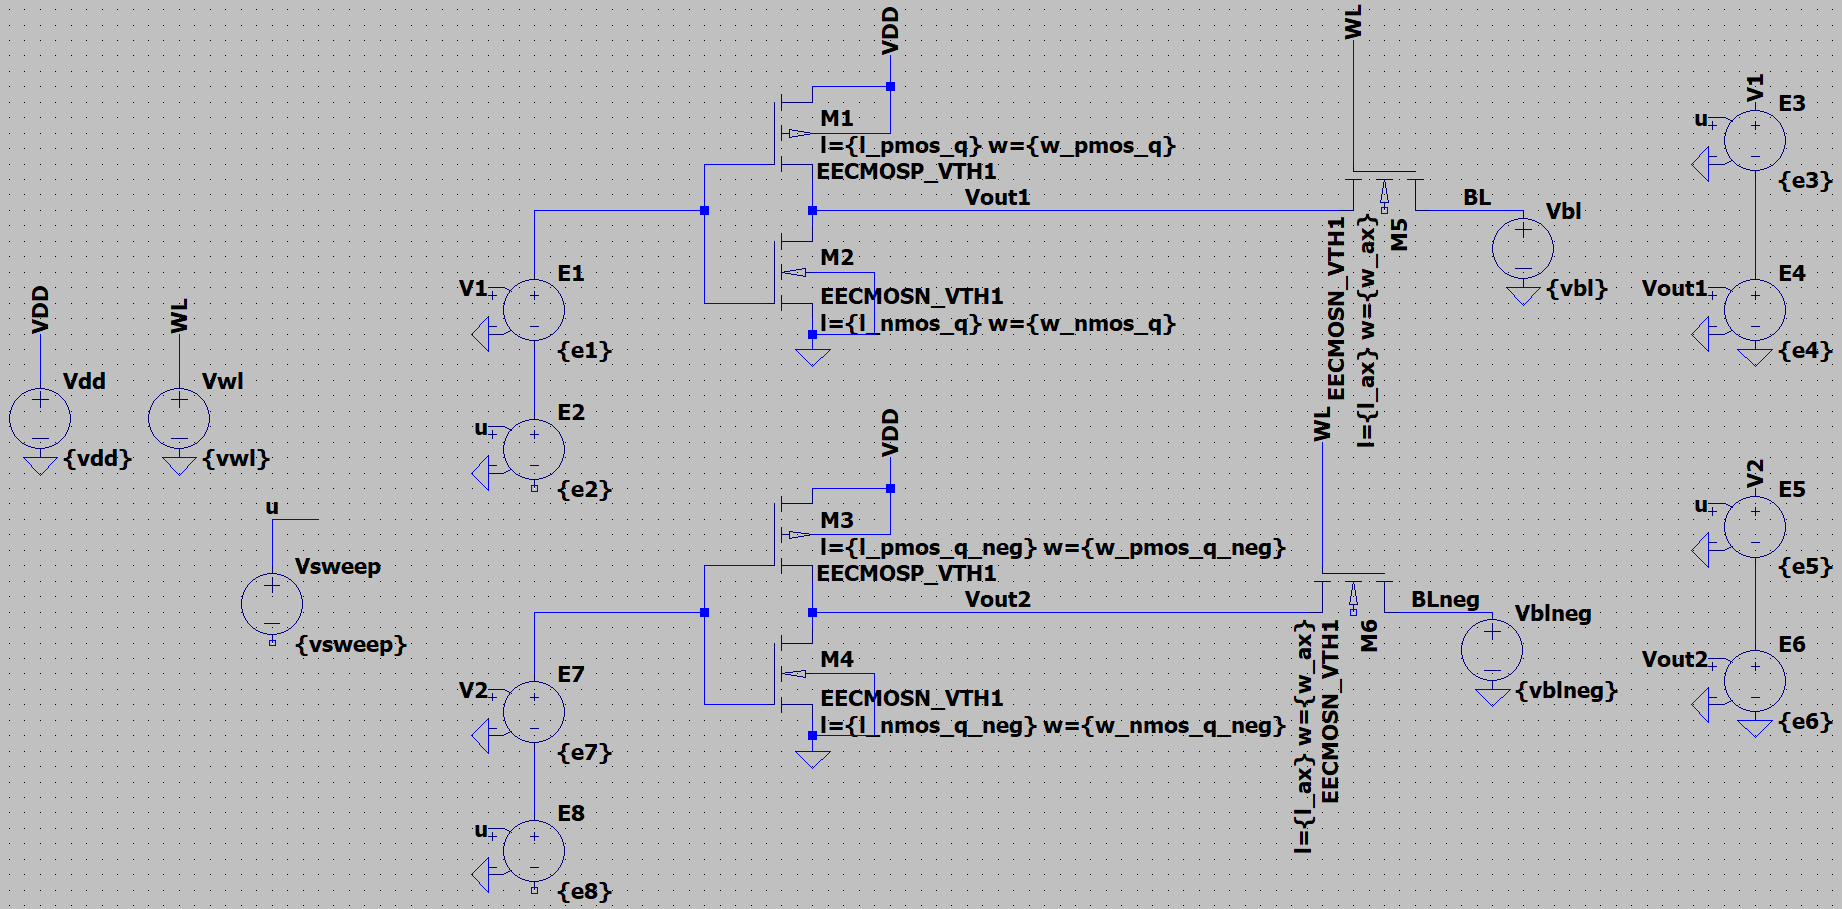

Successful/Total Simulations: 0/1
Raw file: data\gaussian-vth\hold\gaussian_vth_hold_1.raw, Log file: data\gaussian-vth\hold\gaussian_vth_hold_1.log
File opened successfully: data\gaussian-vth\hold\gaussian_vth_hold_1.raw
File not found: ../../images/gaussian_vth_hold_simulation.png
File created successfully: ../../images/gaussian_vth_hold_simulation.png


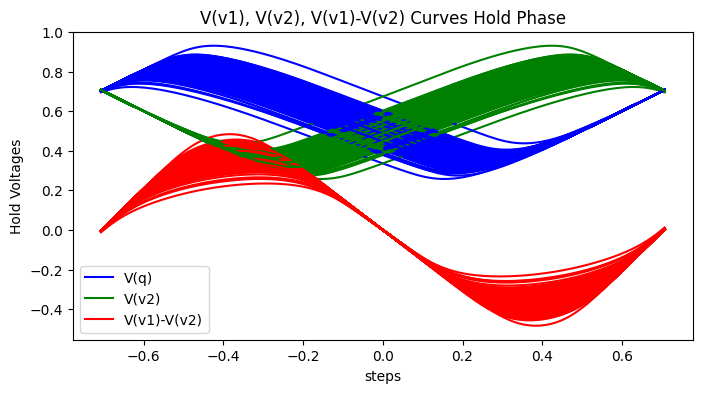

snm_max_gaussian_vth_hold = 275.92
snm_min_gaussian_vth_hold = .measure dc snm_min MIN(0.707*v(V1)-0.707*v(V2)).measure dc snm_min MIN(0.707*v(V1)-0.707*v(V2)).measure dc snm_min MIN(0.707*v(V1)-0.707*v(V2)).measure dc snm_min MIN(0.707*v(V1)-0.707*v(V2)).measure dc snm_min MIN(0.707*v(V1)-0.707*v(V2)).measure dc snm_min MIN(0.707*v(V1)-0.707*v(V2)).measure dc snm_min MIN(0.707*v(V1)-0.707*v(V2)).measure dc snm_min MIN(0.707*v(V1)-0.707*v(V2)).measure dc snm_min MIN(0.707*v(V1)-0.707*v(V2)).measure dc snm_min MIN(0.707*v(V1)-0.707*v(V2)).measure dc snm_min MIN(0.707*v(V1)-0.707*v(V2)).measure dc snm_min MIN(0.707*v(V1)-0.707*v(V2)).measure dc snm_min MIN(0.707*v(V1)-0.707*v(V2)).measure dc snm_min MIN(0.707*v(V1)-0.707*v(V2)).measure dc snm_min MIN(0.707*v(V1)-0.707*v(V2)).measure dc snm_min MIN(0.707*v(V1)-0.707*v(V2)).measure dc snm_min MIN(0.707*v(V1)-0.707*v(V2)).measure dc snm_min MIN(0.707*v(V1)-0.707*v(V2)).measure dc snm_min MIN(0.707*v(V1)-0.707*v(V2)).measure dc snm_min MIN(0

In [17]:
gaussian_vth_hold_netlist = load_asc(
                                asc_file_path=os.path.join(ltspice, "gaussian-vth/hold/gaussian_vth_hold.asc"),
                                schematic_image_path=os.path.join(schematics, "gaussian_vth.png")
                                )
vwl=vwl_hold; vbl=vbl_hold; vblneg=vblneg_hold
gaussian_vth_hold_netlist.set_parameter('l_ax', l_ax_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('w_ax', w_ax_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('l_pmos_q', l_pmos_q_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('w_pmos_q', w_pmos_q_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('l_nmos_q', l_nmos_q_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('w_nmos_q', w_nmos_q_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('vdd', vdd_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('vwl', vwl)
gaussian_vth_hold_netlist.set_parameter('vbl', vbl)
gaussian_vth_hold_netlist.set_parameter('vblneg', vblneg)
gaussian_vth_hold_netlist.set_parameter('vsweep', vsweep_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e1', e1_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e2', e2_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e3', e3_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e4', e4_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e5', e5_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e6', e6_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e7', e7_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e8', e8_gaussian_vth)
gaussian_vth_hold_netlist.add_instructions(
                                        rit_models_montecarlo,
                                        dc_vsweep_gaussian_vth,
                                        step_param_run_gaussian_vth,
                                        snm_max,
                                        snm_min
                                    )
gaussian_vth_hold_runner = SimRunner(output_folder=f"{data}/gaussian-vth/hold/")
gaussian_vth_hold_runner.run(netlist=gaussian_vth_hold_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(gaussian_vth_hold_runner.okSim) + '/' + str(gaussian_vth_hold_runner.runno))

gaussian_vth_hold_raw = ""
gaussian_vth_hold_log = ""
for gaussian_vth_hold_raw, gaussian_vth_hold_log in gaussian_vth_hold_runner:
    print("Raw file: %s, Log file: %s" % (gaussian_vth_hold_raw, gaussian_vth_hold_log))

gaussian_vth_hold_ltr = load_ltr(raw_file_path=gaussian_vth_hold_raw)
v_1_gaussian_vth_hold = gaussian_vth_hold_ltr.get_trace("V(v1)")
v_2_gaussian_vth_hold = gaussian_vth_hold_ltr.get_trace("V(v2)")
vsweep_gaussian_vth_hold = gaussian_vth_hold_ltr.get_trace('vsweep')
steps = gaussian_vth_hold_ltr.get_steps()

plt.figure(figsize=(8, 4))
v1 = []
v2 = []
v1_minus_v2 = []
x_gaussian_vth_hold = []
for step in range(len(steps)):
    v1_curr_value = v_1_gaussian_vth_hold.get_wave(step)
    v1.append(v1_curr_value)
    v2_curr_value = v_2_gaussian_vth_hold.get_wave(step)
    v2.append(v2_curr_value)
    v1_minus_v2_curr_value = v1_curr_value - v2_curr_value
    v1_minus_v2.append(v1_minus_v2_curr_value)
    x_gaussian_vth_hold_curr_value = vsweep_gaussian_vth_hold.get_wave(step)
    x_gaussian_vth_hold.append(x_gaussian_vth_hold_curr_value)
    plt.plot(x_gaussian_vth_hold_curr_value, v1_curr_value, label=steps[step], color='blue')
    plt.plot(x_gaussian_vth_hold_curr_value, v2_curr_value, label=steps[step], color='green')
    plt.plot(x_gaussian_vth_hold_curr_value, v1_minus_v2_curr_value, label=steps[step], color='red')
plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Hold Phase")
plt.xlabel("steps"); plt.ylabel("Hold Voltages")
plt.legend(["V(q)", "V(v2)", "V(v1)-V(v2)"])
gaussian_vth_hold_simulation_path_image = os.path.join(images, "gaussian_vth_hold_simulation.png")
check_output_image(gaussian_vth_hold_simulation_path_image)
plt.savefig(gaussian_vth_hold_simulation_path_image)
plt.show()


w_ax_pick_pos_gaussian_vth_hold = 1

gaussian_vth_hold_log_file_path = f"./{gaussian_vth_hold_log}"
with open(gaussian_vth_hold_log_file_path, "r") as file:
    content = file.read()

snm_max_gaussian_vth_hold_data = re.search(snm_max_seevinck_pattern, content, re.DOTALL).group(1)
snm_max_gaussian_vth_hold_lines = snm_max_gaussian_vth_hold_data.strip().split('\n')[1:]
snm_max_gaussian_vth_hold = [float(line.split('\t')[1]) for line in snm_max_gaussian_vth_hold_lines]
snm_max_gaussian_vth_hold = [1000 * snm_max for snm_max in snm_max_gaussian_vth_hold]

snm_min_gaussian_vth_hold_data = re.search(snm_min_seevinck_pattern, content, re.DOTALL).group(1)
snm_min_gaussian_vth_hold_lines = snm_min_gaussian_vth_hold_data.strip().split('\n')[1:]
snm_min_gaussian_vth_hold = [float(line.split('\t')[1]) for line in snm_min_gaussian_vth_hold_lines]
snm_min_gaussian_vth_hold = [1000 * snm_min for snm_in in snm_min_gaussian_vth_hold]

# plt.figure(figsize=(16, 4))
# plt.plot(snm_max_gaussian_vth_hold)
# plt.plot(snm_min_gaussian_vth_hold)
# plt.xlabel("w_ax"); plt.ylabel("SNM")
# plt.legend(["snm_max","snm_min"])
# plt.title("SNM SEEVINCK GAUSSIAN VTH HOLD GENERATED BY LTSPICE")
# plt.show()
# gaussian_vth_hold_snm_ltspice_path_image = os.path.join(images, "gaussian_vth_hold_snm_ltspice.png")
# check_output_image(gaussian_vth_hold_snm_ltspice_path_image)
# plt.savefig(gaussian_vth_hold_snm_ltspice_path_image)
# plt.show()

print(f'snm_max_gaussian_vth_hold = {snm_max_gaussian_vth_hold[w_ax_pick_pos_gaussian_vth_hold]}')
print(f'snm_min_gaussian_vth_hold = {snm_min_gaussian_vth_hold[w_ax_pick_pos_gaussian_vth_hold]}')

V_TH       SNM(HOLD)                     
<class 'ValueError'> u 243.07402517906127 mV         
<class 'ValueError'> u 275.96178005456676 mV         
<class 'ValueError'> u 263.9859637844388 mV          
<class 'ValueError'> u 255.94217452586187 mV         
<class 'ValueError'> u 322.78998439668703 mV         
<class 'ValueError'> u 273.29483284791866 mV         
<class 'ValueError'> u 265.35185885097985 mV         
<class 'ValueError'> u 211.38730797214643 mV         
<class 'ValueError'> u 232.14045832575917 mV         
<class 'ValueError'> u 253.03726621252127 mV         
<class 'ValueError'> u 220.49250239019744 mV         
<class 'ValueError'> u 242.17437962417196 mV         
<class 'ValueError'> u 237.40965732659114 mV         
<class 'ValueError'> u 274.78874896681157 mV         
<class 'ValueError'> u 255.28575843372897 mV         
<class 'ValueError'> u 249.481652705021 mV           
<class 'ValueError'> u 279.04180852347014 mV         
<class 'ValueError'> u 250.9540317843248

<Figure size 1600x400 with 0 Axes>

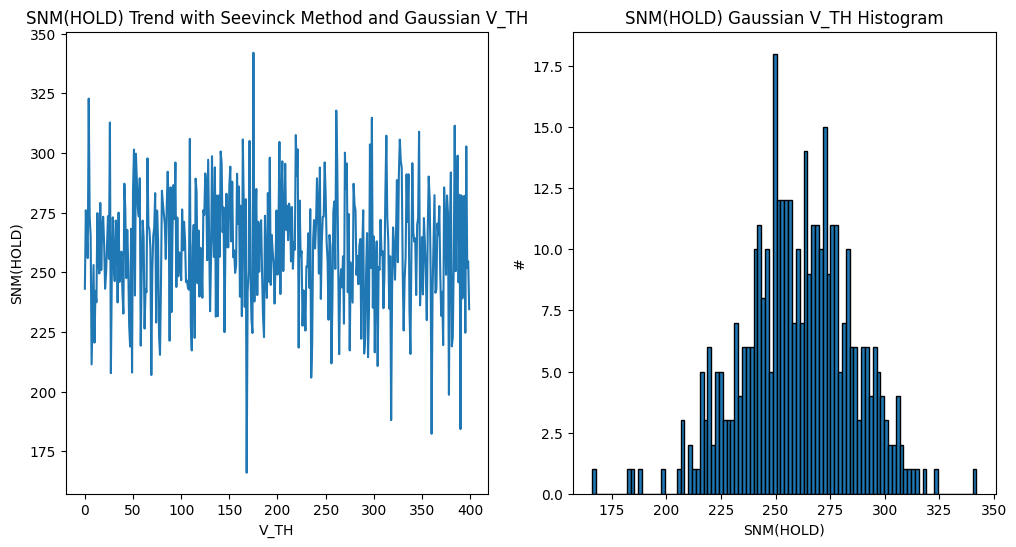

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(16, 4))
print("{:<10} {:<30}".format("V_TH", "SNM(HOLD)"))

v_th_hold_gaussian_vth = []
snm_hold_gaussian_vth = []

for i_array, v1_minus_v2_array in enumerate(v1_minus_v2):
    v1_minus_v2_curr_array = abs(v1_minus_v2_array)
    
    snm_hold_curr = (1/sqrt(2)) * max(v1_minus_v2_curr_array)
    snm_hold_curr = 1000 * snm_hold_curr
    snm_hold_gaussian_vth.append(snm_hold_curr)
    print("{:<10} {:<30}".format(f'{ValueError} u', f'{snm_hold_curr} mV'))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(snm_hold_gaussian_vth)  
# axs[0].plot(w_ax_hold_seevinck, snm_hold_seevinck)
axs[0].set_title("SNM(HOLD) Trend with Seevinck Method and Gaussian V_TH")
axs[0].set_xlabel("V_TH"); axs[0].set_ylabel("SNM(HOLD)")
axs[1].hist(snm_hold_gaussian_vth, bins=100, edgecolor='black')
axs[1].set_xlabel("SNM(HOLD)"); axs[1].set_ylabel("#") 
axs[1].set_title("SNM(HOLD) Gaussian V_TH Histogram")
gaussian_vth_snm_hold_path_image = os.path.join(images, "gaussian_vth_snm_hold.png")
check_output_image(gaussian_vth_snm_hold_path_image)
plt.savefig(gaussian_vth_snm_hold_path_image)
plt.show()
plt.tight_layout()

snm_gaussian_vth_hold = 275.96178005456676
File not found: ../../images/v1_minus_v2_gaussian_vth_hold.png
File created successfully: ../../images/v1_minus_v2_gaussian_vth_hold.png


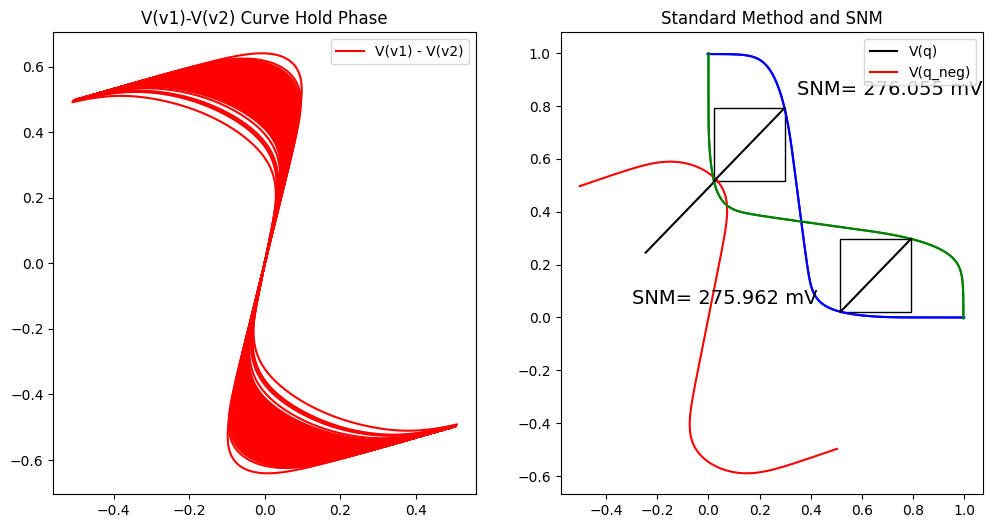

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
w_ax_pick_pos_gaussian_vth_hold = 1
vq_gaussian_vth_hold = v1
vqneg_gaussian_vth_hold = v2
vq_vqneg_gaussian_vth_hold = vq_gaussian_vth_hold[w_ax_pick_pos_gaussian_vth_hold] - vqneg_gaussian_vth_hold[w_ax_pick_pos_gaussian_vth_hold]
for vq_array, vqneg_array in zip(vq_gaussian_vth_hold, vqneg_gaussian_vth_hold):
    vq_vqneg_array = vq_array - vqneg_array
    x_diff, y_diff = rotate_points(x_gaussian_vth_hold[w_ax_pick_pos_gaussian_vth_hold], vq_vqneg_array, -45)
    axs[0].plot(x_diff, y_diff, color='red')
axs[0].set_title("V(v1)-V(v2) Curve Hold Phase")
axs[0].legend(["V(v1) - V(v2)"])

snm_gaussian_vth_hold, x_snm_start, y_snm_start = seevinck_processing(x_v1_minus_v2=x_gaussian_vth_hold[w_ax_pick_pos_gaussian_vth_hold], v1_minus_v2=vq_vqneg_gaussian_vth_hold, ax=axs[1])
snm_gaussian_vth_hold = (1/sqrt(2)) * snm_gaussian_vth_hold
axs[1].text(x_snm_start + 0.05, y_snm_start + 0.05, 'SNM= %.3f mV' % snm_gaussian_vth_hold, fontsize=14)
axs[1].set_title("V(v1)-V(v2) Curve Hold Phase and SNM")
print(f'snm_gaussian_vth_hold = {snm_gaussian_vth_hold}')

w_ax_pick_pos_gaussian_vth_hold = 1
x1, y1 = rotate_points(x_gaussian_vth_hold[w_ax_pick_pos_gaussian_vth_hold], v1[w_ax_pick_pos_gaussian_vth_hold], -45)
x2, y2 = rotate_points(x_gaussian_vth_hold[w_ax_pick_pos_gaussian_vth_hold], v2[w_ax_pick_pos_gaussian_vth_hold], -45)

axs[1].plot(x1, y1, color='blue')
axs[1].plot(x2, y2, color='green')
snm_gaussian_vth_hold = standard_processing(x_vq=x1, vq=y1, x_vqneg=x2, vqneg=y2, ax=axs[1])

v1_minus_v2_gaussian_vth_hold_path_image = os.path.join(images, "v1_minus_v2_gaussian_vth_hold.png")
check_output_image(v1_minus_v2_gaussian_vth_hold_path_image)
plt.savefig(v1_minus_v2_gaussian_vth_hold_path_image)
plt.show()

snm_gaussian_vth_hold = [276.05494024]


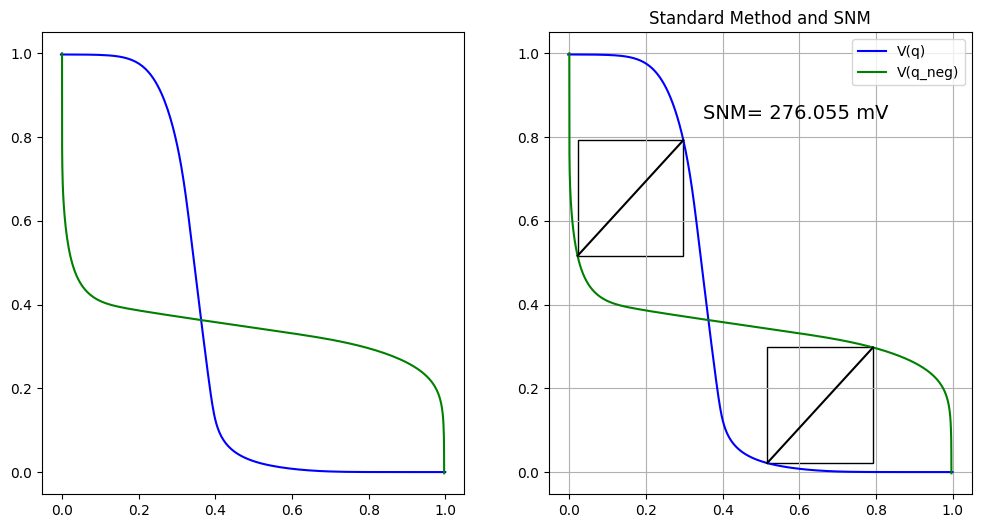

In [20]:
w_ax_pick_pos_gaussian_vth_hold = 1
x1, y1 = rotate_points(x_gaussian_vth_hold[w_ax_pick_pos_gaussian_vth_hold], v1[w_ax_pick_pos_gaussian_vth_hold], -45)
x2, y2 = rotate_points(x_gaussian_vth_hold[w_ax_pick_pos_gaussian_vth_hold], v2[w_ax_pick_pos_gaussian_vth_hold], -45)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(x1, y1, color='blue')
axs[0].plot(x2, y2, color='green')
snm_gaussian_vth_hold = standard_processing(x_vq=x1, vq=y1, x_vqneg=x2, vqneg=y2, ax=axs[1])
print(f'snm_gaussian_vth_hold = {snm_gaussian_vth_hold}')

plt.show()

<h3>Read Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/gaussian-vth/read/gaussian_vth_read.asc


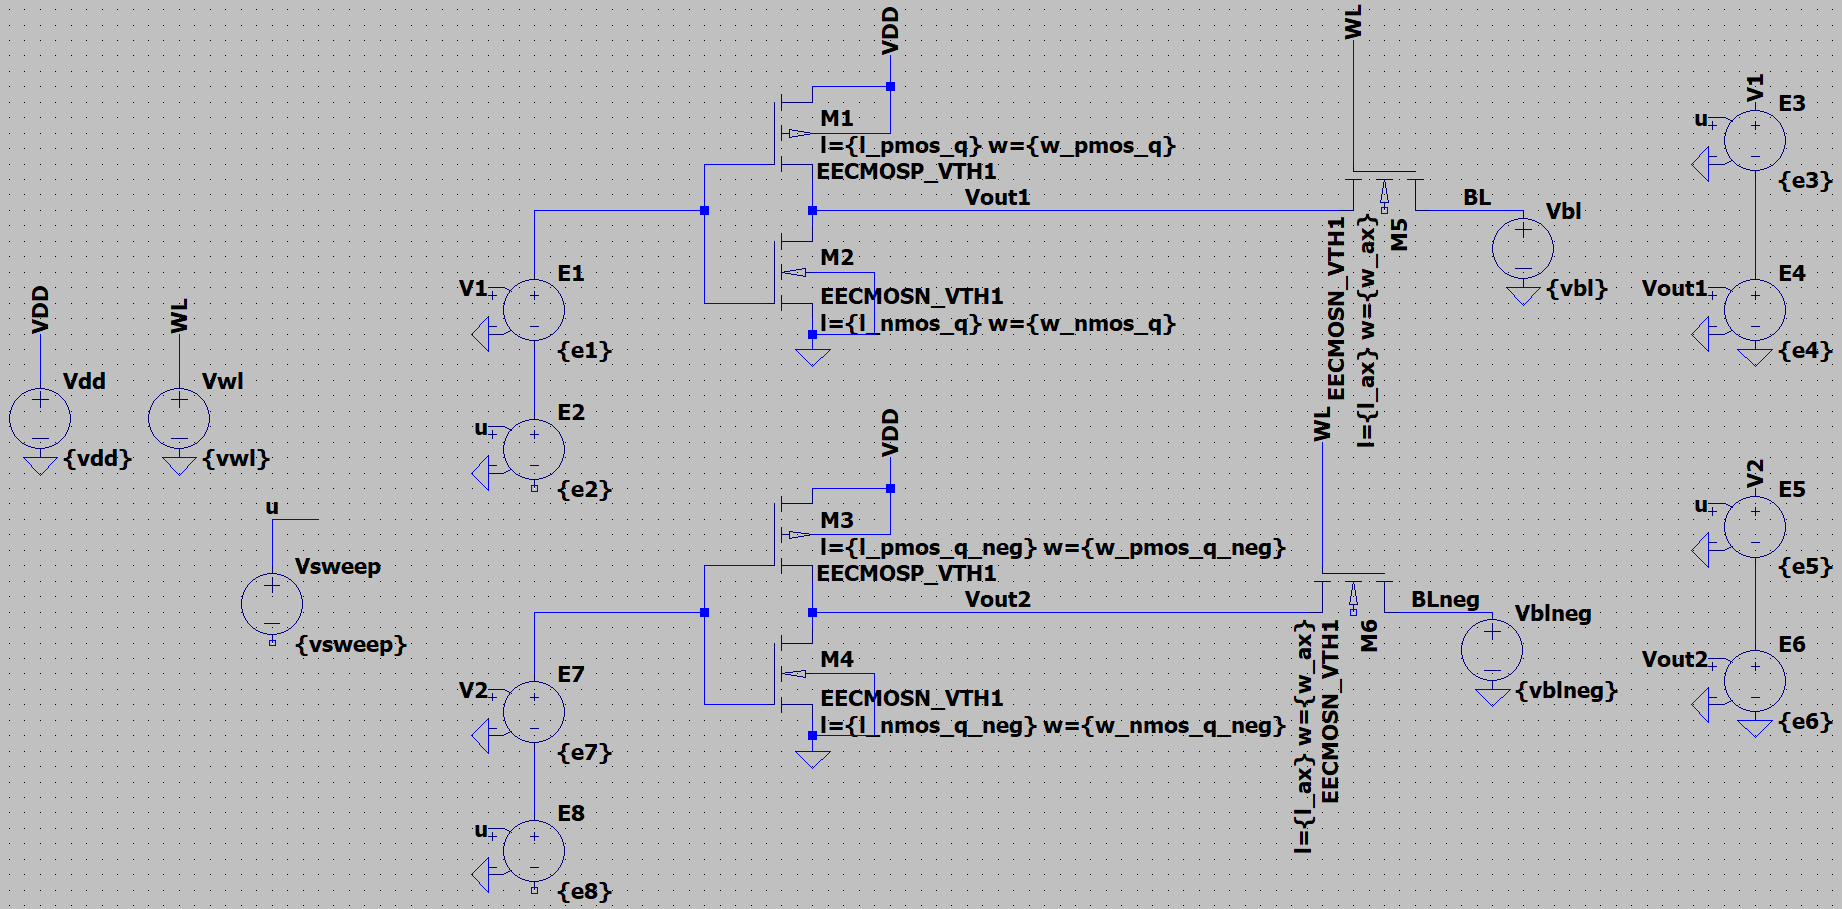

Successful/Total Simulations: 0/1
Raw file: data\gaussian-vth\read\gaussian_vth_read_1.raw, Log file: data\gaussian-vth\read\gaussian_vth_read_1.log
File opened successfully: data\gaussian-vth\read\gaussian_vth_read_1.raw
File updated successfully: ../../images/gaussian_vth_read_simulation.png


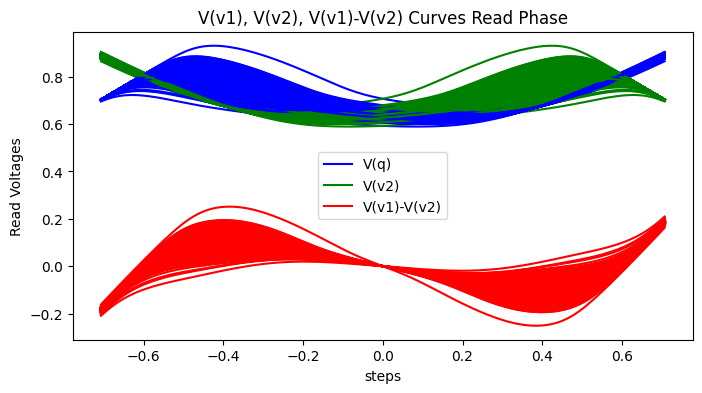

snm_max_gaussian_vth_read_mean = 130.98673
snm_min_gaussian_vth_read_mean = 130.986235


In [21]:
gaussian_vth_read_netlist = load_asc(
                                asc_file_path=os.path.join(ltspice, "gaussian-vth/read/gaussian_vth_read.asc"),
                                schematic_image_path=os.path.join(schematics, "gaussian_vth.png")
                                )
vwl=vwl_read; vbl=vbl_read; vblneg=vblneg_read
gaussian_vth_read_netlist.set_parameter('l_ax', l_ax_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('w_ax', w_ax_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('l_pmos_q', l_pmos_q_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('w_pmos_q', w_pmos_q_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('l_nmos_q', l_nmos_q_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('w_nmos_q', w_nmos_q_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('vdd', vdd_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('vwl', vwl)
gaussian_vth_read_netlist.set_parameter('vbl', vbl)
gaussian_vth_read_netlist.set_parameter('vblneg', vblneg)
gaussian_vth_read_netlist.set_parameter('vsweep', vsweep_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('e1', e1_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('e2', e2_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('e3', e3_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('e4', e4_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('e5', e5_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('e6', e6_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('e7', e7_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('e8', e8_gaussian_vth)
gaussian_vth_read_netlist.add_instructions(
                                        rit_models_montecarlo,
                                        dc_vsweep_gaussian_vth,
                                        step_param_run_gaussian_vth,
                                        snm_max,
                                        snm_min
                                    )
gaussian_vth_read_runner = SimRunner(output_folder=f"{data}/gaussian-vth/read/")
gaussian_vth_read_runner.run(netlist=gaussian_vth_read_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(gaussian_vth_read_runner.okSim) + '/' + str(gaussian_vth_read_runner.runno))

gaussian_vth_read_raw = ""
gaussian_vth_read_log = ""
for gaussian_vth_read_raw, gaussian_vth_read_log in gaussian_vth_read_runner:
    print("Raw file: %s, Log file: %s" % (gaussian_vth_read_raw, gaussian_vth_read_log))

gaussian_vth_read_ltr = load_ltr(raw_file_path=gaussian_vth_read_raw)
v_1_gaussian_vth_read = gaussian_vth_read_ltr.get_trace("V(v1)")
v_2_gaussian_vth_read = gaussian_vth_read_ltr.get_trace("V(v2)")
vsweep_gaussian_vth_read = gaussian_vth_read_ltr.get_trace('vsweep')
steps = gaussian_vth_read_ltr.get_steps()

plt.figure(figsize=(8, 4))
v1 = []
v2 = []
v1_minus_v2 = []
x_gaussian_vth_read = []
for step in range(len(steps)):
    v1_curr_value = v_1_gaussian_vth_read.get_wave(step)
    v1.append(v1_curr_value)
    v2_curr_value = v_2_gaussian_vth_read.get_wave(step)
    v2.append(v2_curr_value)
    v1_minus_v2_curr_value = v1_curr_value - v2_curr_value
    v1_minus_v2.append(v1_minus_v2_curr_value)
    x_gaussian_vth_read_curr_value = vsweep_gaussian_vth_read.get_wave(step)
    x_gaussian_vth_read.append(x_gaussian_vth_read_curr_value)
    plt.plot(x_gaussian_vth_read_curr_value, v1_curr_value, label=steps[step], color='blue')
    plt.plot(x_gaussian_vth_read_curr_value, v2_curr_value, label=steps[step], color='green')
    plt.plot(x_gaussian_vth_read_curr_value, v1_minus_v2_curr_value, label=steps[step], color='red')
plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Read Phase")
plt.xlabel("steps"); plt.ylabel("Read Voltages")
plt.legend(["V(q)", "V(v2)", "V(v1)-V(v2)"])
gaussian_vth_read_simulation_path_image = os.path.join(images, "gaussian_vth_read_simulation.png")
check_output_image(gaussian_vth_read_simulation_path_image)
plt.savefig(gaussian_vth_read_simulation_path_image)
plt.show()


w_ax_pick_pos_gaussian_vth_read = 1

gaussian_vth_read_log_file_path = f"./{gaussian_vth_read_log}"
with open(gaussian_vth_read_log_file_path, "r") as file:
    content = file.read()

snm_max_gaussian_vth_read_data = re.search(snm_max_seevinck_pattern, content, re.DOTALL).group(1)
snm_max_gaussian_vth_read_lines = snm_max_gaussian_vth_read_data.strip().split('\n')[1:]
snm_max_gaussian_vth_read = [float(line.split('\t')[1]) for line in snm_max_gaussian_vth_read_lines]
snm_max_gaussian_vth_read = [1000 * snm_max for snm_max in snm_max_gaussian_vth_read]

snm_min_gaussian_vth_read_data = re.search(snm_min_seevinck_pattern, content, re.DOTALL).group(1)
snm_min_gaussian_vth_read_lines = snm_min_gaussian_vth_read_data.strip().split('\n')[1:]
snm_min_gaussian_vth_read = [float(line.split('\t')[1]) for line in snm_min_gaussian_vth_read_lines]
snm_min_gaussian_vth_read = [1000 * snm_min for snm_min in snm_min_gaussian_vth_read]

# plt.figure(figsize=(16, 4))
# plt.plot(snm_max_gaussian_vth_read)
# plt.plot(snm_min_gaussian_vth_read)
# plt.xlabel("w_ax"); plt.ylabel("SNM")
# plt.legend(["snm_max","snm_min"])
# plt.title("SNM SEEVINCK GAUSSIAN VTH READ GENERATED BY LTSPICE")
# plt.show()
# gaussian_vth_read_snm_ltspice_path_image = os.path.join(images, "gaussian_vth_read_snm_ltspice.png")
# check_output_image(gaussian_vth_read_snm_ltspice_path_image)
# plt.savefig(gaussian_vth_read_snm_ltspice_path_image)
# plt.show()
from statistics import mean
print(f'snm_max_gaussian_vth_read_mean = {mean(abs(value) for value in snm_max_gaussian_vth_read)}')
print(f'snm_min_gaussian_vth_read_mean = {mean(abs(value) for value in snm_min_gaussian_vth_read)}')

V_TH       SNM(READ)                     
<class 'ValueError'> u 132.81736371238034 mV         
<class 'ValueError'> u 128.23629630718574 mV         
<class 'ValueError'> u 129.9445502241808 mV          
<class 'ValueError'> u 131.30968664744867 mV         
<class 'ValueError'> u 137.37752628071357 mV         
<class 'ValueError'> u 128.5250865131824 mV          
<class 'ValueError'> u 129.836991466781 mV           
<class 'ValueError'> u 138.22594234123787 mV         
<class 'ValueError'> u 134.90713090209601 mV         
<class 'ValueError'> u 131.73418970565038 mV         
<class 'ValueError'> u 136.47596304421702 mV         
<class 'ValueError'> u 133.4009711237107 mV          
<class 'ValueError'> u 134.13559069325558 mV         
<class 'ValueError'> u 128.41887645493495 mV         
<class 'ValueError'> u 131.2581410517198 mV          
<class 'ValueError'> u 132.27451230356004 mV         
<class 'ValueError'> u 127.72943830699374 mV         
<class 'ValueError'> u 132.0660118439766

<Figure size 1600x400 with 0 Axes>

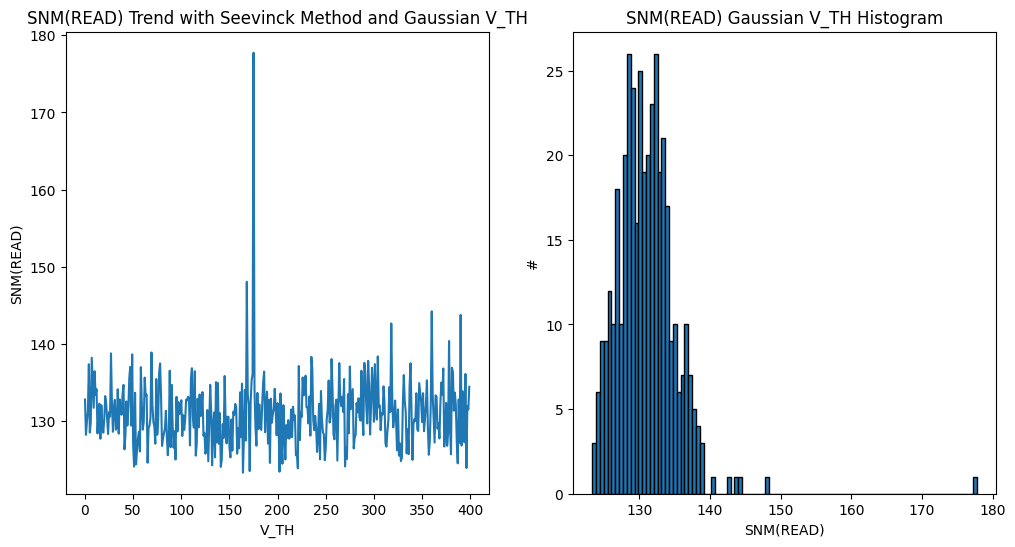

snm_gaussian_vth_read_mean = 130.98673
snm_gaussian_vth_read_stdev = 4.423294622571526


<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize=(16, 4))
print("{:<10} {:<30}".format("V_TH", "SNM(READ)"))

v_th_read_gaussian_vth = []
snm_read_gaussian_vth = []

for i_array, v1_minus_v2_array in enumerate(v1_minus_v2):
    v1_minus_v2_curr_array = abs(v1_minus_v2_array)
    
    snm_read_curr = (1/sqrt(2)) * max(v1_minus_v2_curr_array)
    snm_read_curr = 1000 * snm_read_curr
    snm_read_gaussian_vth.append(snm_read_curr)
    print("{:<10} {:<30}".format(f'{ValueError} u', f'{snm_read_curr} mV'))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(snm_read_gaussian_vth)  
# axs[0].plot(w_ax_hold_seevinck, snm_hold_seevinck)
axs[0].set_title("SNM(READ) Trend with Seevinck Method and Gaussian V_TH")
axs[0].set_xlabel("V_TH"); axs[0].set_ylabel("SNM(READ)")
axs[1].hist(snm_read_gaussian_vth, bins=100, edgecolor='black')
axs[1].set_xlabel("SNM(READ)"); axs[1].set_ylabel("#") 
axs[1].set_title("SNM(READ) Gaussian V_TH Histogram")
gaussian_vth_snm_read_path_image = os.path.join(images, "gaussian_vth_snm_read.png")
check_output_image(gaussian_vth_snm_read_path_image)
plt.savefig(gaussian_vth_snm_read_path_image)
plt.show()
plt.tight_layout()

from statistics import mean, stdev
print(f'snm_gaussian_vth_read_mean = {mean(abs(value) for value in snm_max_gaussian_vth_read)}')
print(f'snm_gaussian_vth_read_stdev = {stdev(abs(value) for value in snm_min_gaussian_vth_read)}')

snm_gaussian_vth_read = 86.41465287940177
File updated successfully: ../../images/v1_minus_v2_gaussian_vth_read.png


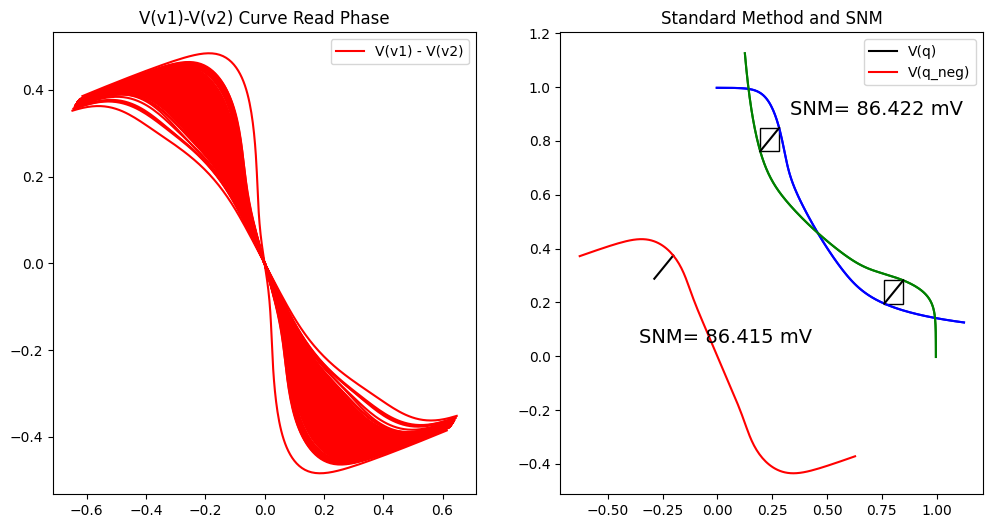

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
w_ax_pick_pos_gaussian_vth_read = 1
vq_gaussian_vth_read = v1
vqneg_gaussian_vth_read = v2
vq_vqneg_gaussian_vth_read = vq_gaussian_vth_read[w_ax_pick_pos_gaussian_vth_read] - vqneg_gaussian_vth_read[w_ax_pick_pos_gaussian_vth_read]
vq_vqneg_array = []
for vq_array, vqneg_array in zip(vq_gaussian_vth_read, vqneg_gaussian_vth_read):
    vq_vqneg_array = vq_array - vqneg_array
    x_diff, y_diff = rotate_points(x_gaussian_vth_read[w_ax_pick_pos_gaussian_vth_read], vq_vqneg_array, -45)
    axs[0].plot(x_diff, y_diff, color='red')
axs[0].set_title("V(v1)-V(v2) Curve Read Phase")
axs[0].legend(["V(v1) - V(v2)"])


snm_gaussian_vth_read, x_snm_start, y_snm_start = seevinck_processing(x_v1_minus_v2=x_gaussian_vth_read[w_ax_pick_pos_gaussian_vth_read], v1_minus_v2=vq_vqneg_gaussian_vth_read, ax=axs[1])
snm_gaussian_vth_read = (1/sqrt(2)) * snm_gaussian_vth_read
axs[1].text(x_snm_start + 0.05, y_snm_start + 0.05, 'SNM= %.3f mV' % snm_gaussian_vth_read, fontsize=14)
axs[1].set_title("V(v1)-V(v2) Curve Read Phase and SNM")
print(f'snm_gaussian_vth_read = {snm_gaussian_vth_read}')

w_ax_pick_pos_gaussian_vth_read = 1
x1, y1 = rotate_points(x_gaussian_vth_read[w_ax_pick_pos_gaussian_vth_read], v1[w_ax_pick_pos_gaussian_vth_read], -45)
x2, y2 = rotate_points(x_gaussian_vth_read[w_ax_pick_pos_gaussian_vth_read], v2[w_ax_pick_pos_gaussian_vth_read], -45)

axs[1].plot(x1, y1, color='blue')
axs[1].plot(x2, y2, color='green')
snm_gaussian_vth_read = standard_processing(x_vq=x1, vq=y1, x_vqneg=x2, vqneg=y2, ax=axs[1])

v1_minus_v2_gaussian_vth_read_path_image = os.path.join(images, "v1_minus_v2_gaussian_vth_read.png")
check_output_image(v1_minus_v2_gaussian_vth_read_path_image)
plt.savefig(v1_minus_v2_gaussian_vth_read_path_image)
plt.show()

snm_gaussian_vth_read = [86.42179868]


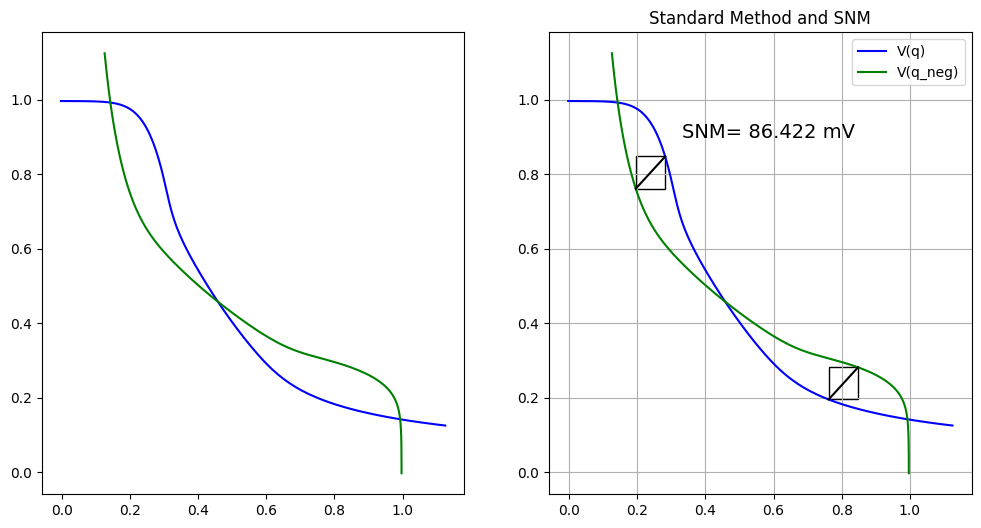

In [24]:
w_ax_pick_pos_gaussian_vth_read = 1
x1, y1 = rotate_points(x_gaussian_vth_read[w_ax_pick_pos_gaussian_vth_read], v1[w_ax_pick_pos_gaussian_vth_read], -45)
x2, y2 = rotate_points(x_gaussian_vth_read[w_ax_pick_pos_gaussian_vth_read], v2[w_ax_pick_pos_gaussian_vth_read], -45)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(x1, y1, color='blue')
axs[0].plot(x2, y2, color='green')
snm_gaussian_vth_read = standard_processing(x_vq=x1, vq=y1, x_vqneg=x2, vqneg=y2, ax=axs[1])
print(f'snm_gaussian_vth_read = {snm_gaussian_vth_read}')

plt.show()